In [73]:
from IPython.display import Image

# CS634 Fall Final Project 

Name: Jaysheel Dodia<br>
UCID: jd849<br>
MailID: jd849@njit.edu<br>
Date: 24/11/2024 (DD/MM/YYYY)<br>
Instructur: Dr. Yasser Abduallah<br>
Class: CS634-101<br>

# Abstract

In this project we will perform classification of emails into "spam" and "ham" categories using Machine Learning and Deep Learning, specifically using Random Forest Classification, Support Vector Machines (SVM) and Long Short-Term Memory (LSTM) neural networks. The goal is to develop a model which effectively classifies the email as a "spam" or a "ham" using Random Forest, SVM and LSTM. This project uses publicly available Spam Classification Dataset. We implement data preprocessing techniques, and evaluates the models' performance using metrics such as accuracy, precision, recall, and F1-score. We also perform K-Fold validation on the dataset on each of the 3 algorithms and compare the resutls using the evaluation metrics. 

# Introduction

In this project applies multiple Machine Learning and Deep Learning algorithms - Random Forest Classification, Support Vector Machine and Long Short-Term Memory (LSTM) network - to classify emails as "spam" or "ham". The project involves preprocessing a publicly available dataset, training multiple models using K-Fold Cross Validation, and evaluating performance using metrics. By doing this we are able to compare the performance of different models and their effectiveness for training a text-classification model.

# Methods

## Random Forest Classification

Random Forest is an ensemble learning algorithm works by creating multiple decision trees during training and outputs the mode of the classes (classification) or mean prediction (regression) of the individual trees. It is an extension of the Decision Tree algorithm and is widely used due to its simplicity, flexibility, and robustness. Random Forest overcomes many of the limitations of a single decision tree by combining the predictions of multiple trees. This reduces the risk of overfitting and improving predictive performance.

## Support Vector Machine (SVM)

A support vector machine (SVM) is a supervised machine learning algorithm that classifies data by finding an optimal line or hyperplane that maximizes the distance between each class in an N-dimensional space. It works by diving the virtual plane into maximum separating hyperplane between the different classes in the target feature, making them suitable for classification tasks.

## Long Short-Term Memory (LSTM)

Long Short-Term Memory is an improved version of recurrent neural network (RNN). Learning long-term dependencies might be challenging for a typical RNN because it only has one hidden state that is transferred through time. The memory cell, a container that can store information for a long time, is introduced in the LSTM model to solve this issue.

## Dataset

The Spam Ham text classification dataset is a widely used collection of text messages or emails labeled as either spam (unwanted/harmful) or ham (legitimate). This dataset serves as a valuable resource for developing and evaluating machine learning and deep learning models in natural language processing tasks, particularly for spam detection and text classification.
The dataset can be downloaded from the following link: [Dataset Link](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset)

## Libraries Used

|Library|Usage| Version |
| -------- | -------- |-------- |
|Numpy | For matrix operations| 2.0.2 |
|Pandas | Data manipulations and analysis| 2.2.3 |
|Matplotlib | Graph Plotting library| 3.9.2 |
|Seaborn | High-level plotting based on Matplotlib| 0.13.2 |
|Scikit-Learn | Machine Learning and Data Pre-processing| 1.5.2 |
|Tensorflow | Build Neural Network and LSTM| 2.18.0 |

## Prerequisite

1. Open up a terminal in our project directory (Refer Screenshot 1)
2. Now create a python virtual environment using the code `python -m venv venv` (Refer screenshot 2)
3. Now we will activate the environment to use it using the command `.\venv\Scripts\activate` if you're on windows. If you're on linux activate the environment using the command `source venv/bin/activate` (Refer Screenshot 3. I am using windows).
4. Once activated, install the requirements for our project using the command `pip install -r requirements.txt`. (Refer Screenshot 4)
5. Now, we can execute our python file by writing `python dodia_jaysheel_finaltermproj.py`. (Refer Screenshot 5)

## Note
* The graph plots used for visualization may be displayed differently while running the python file compared to the jupyter notebook. This is due to a change in the visual environment.<br>
* On running the python file, when the graphs are generated, you will have to close the graph's window for the script to execute further. This happens because the `plt.show()` function blocks the terminal execution as long as the graph is being displayed. Close the graph window to continue.

#### Screenshot 1

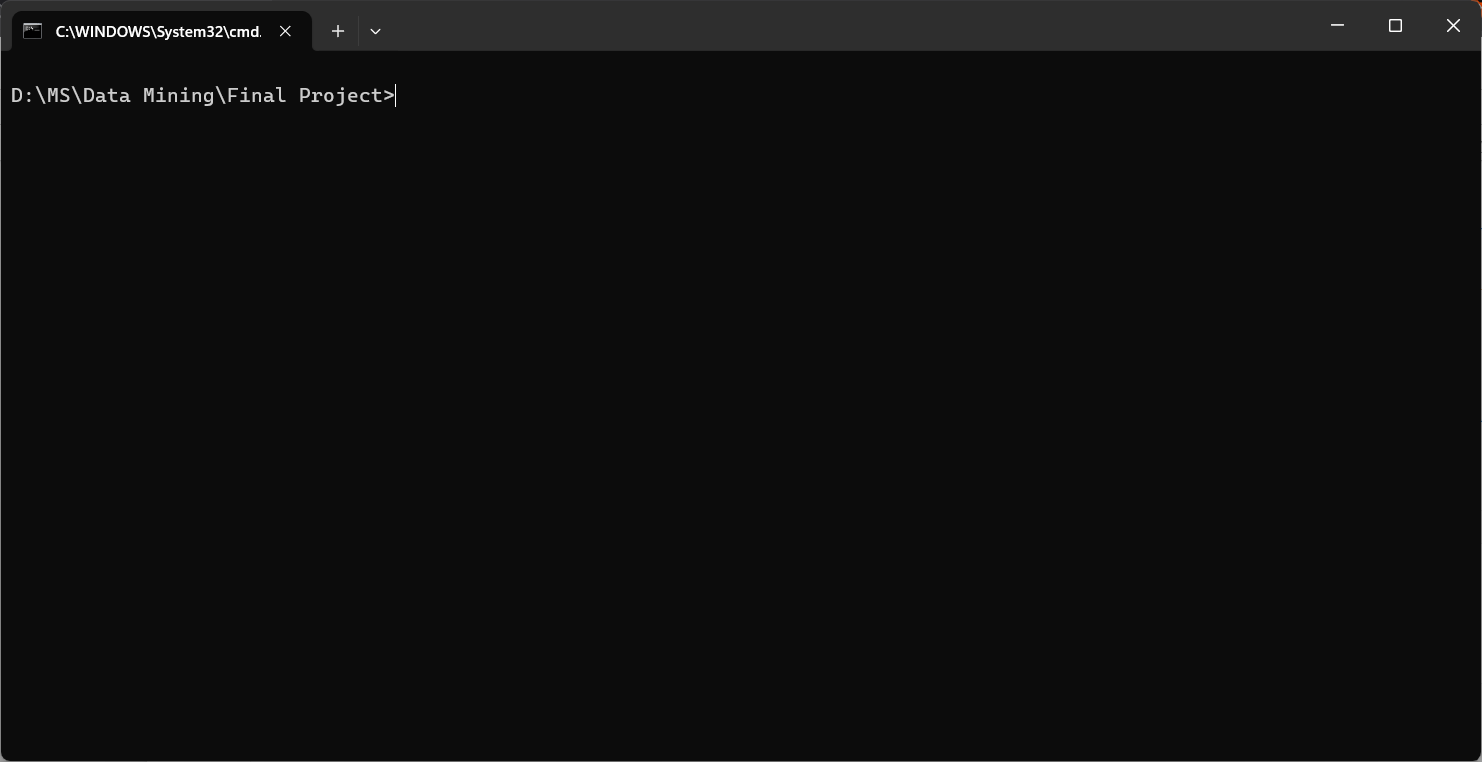

In [74]:
Image('ss/1.png')

#### Screenshot 2

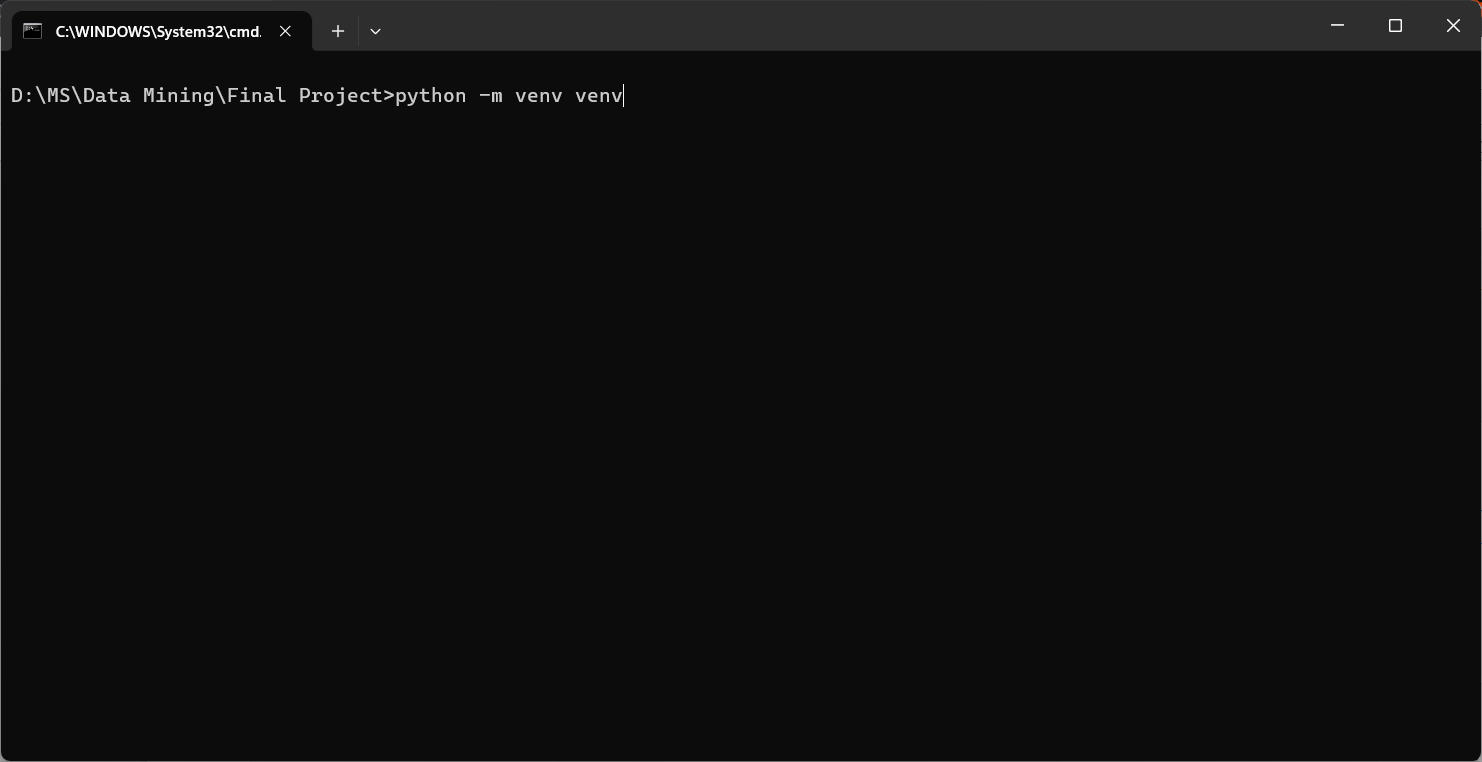

In [75]:
Image('ss/2.png')

#### Screenshot 3

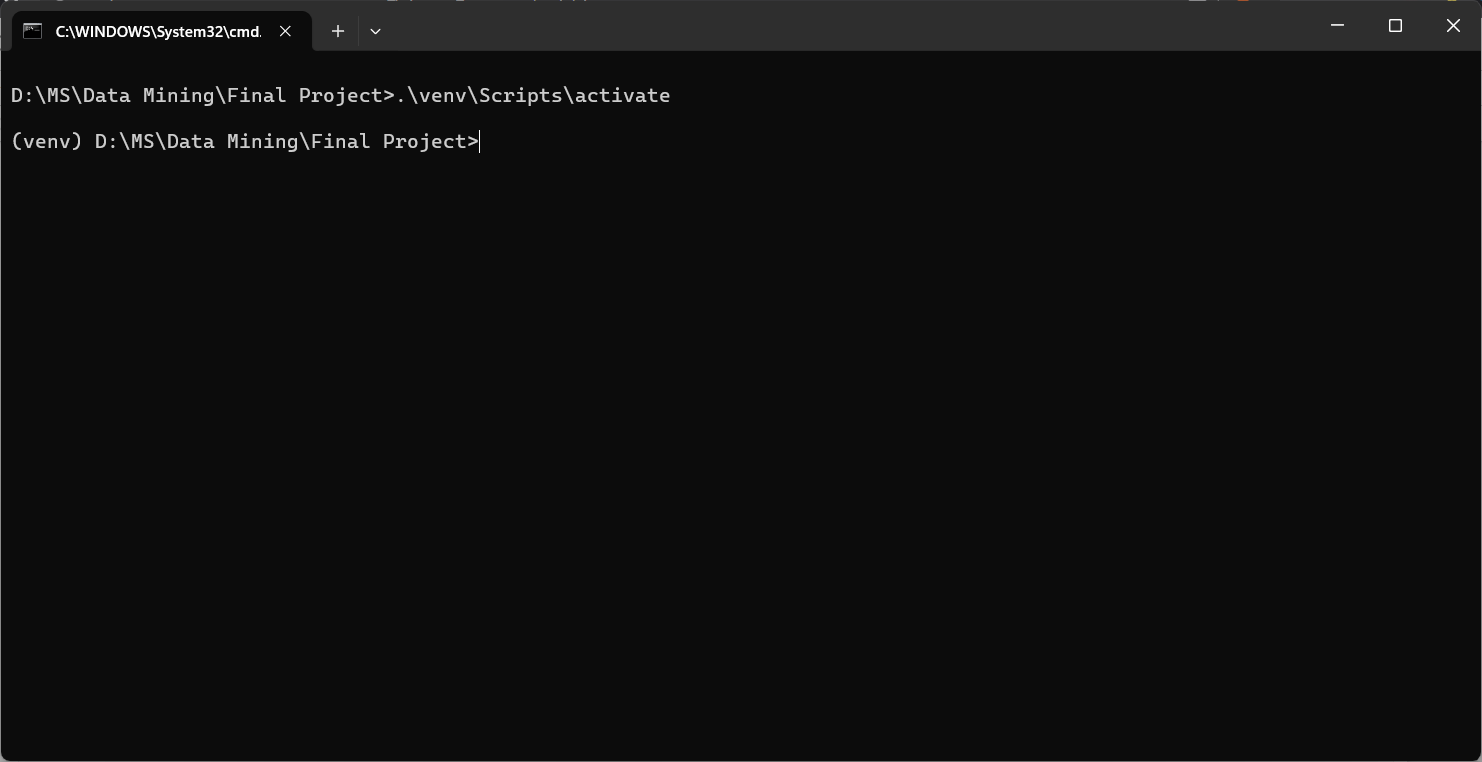

In [76]:
Image('ss/3.png')

#### Screenshot 4

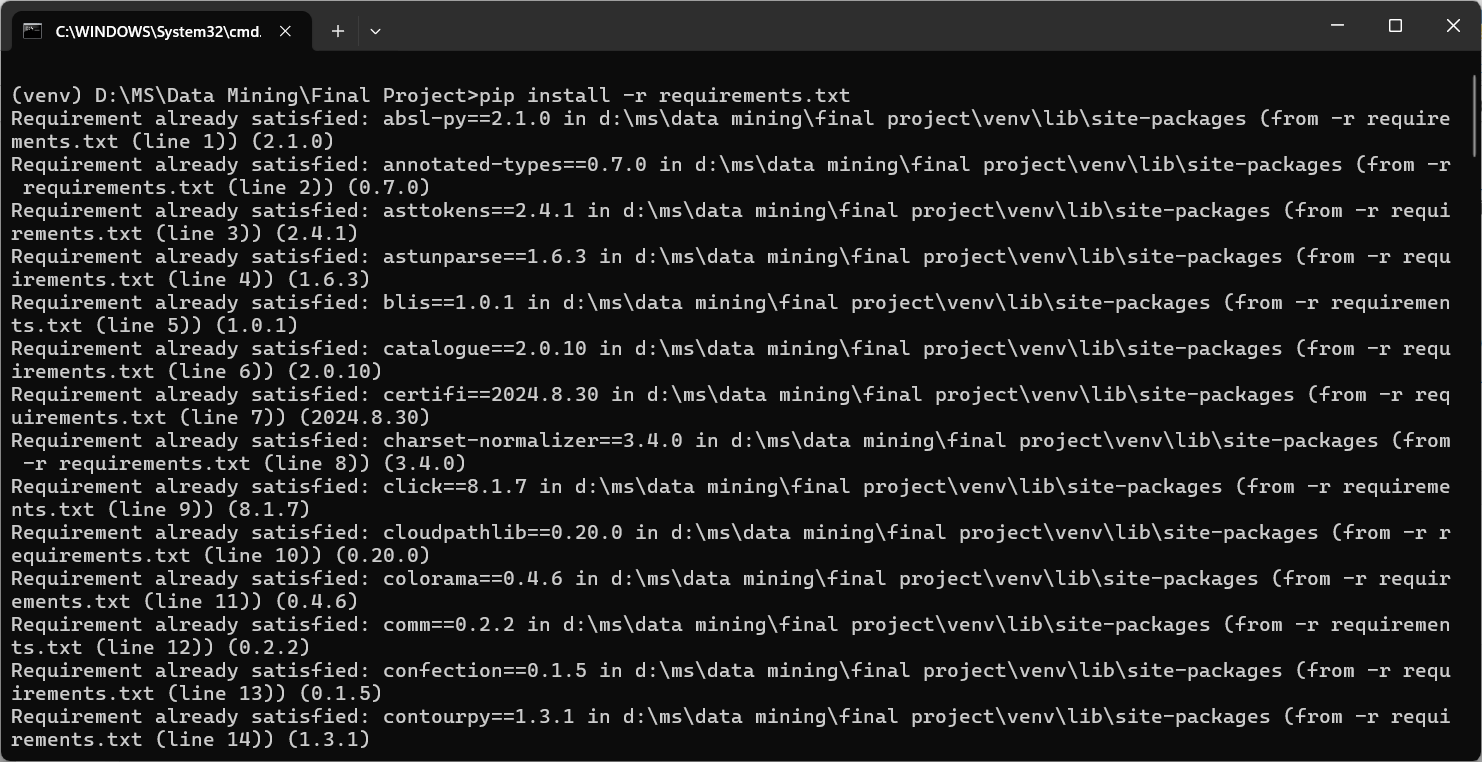

In [77]:
Image('ss/4.png')

#### Screenshot 5

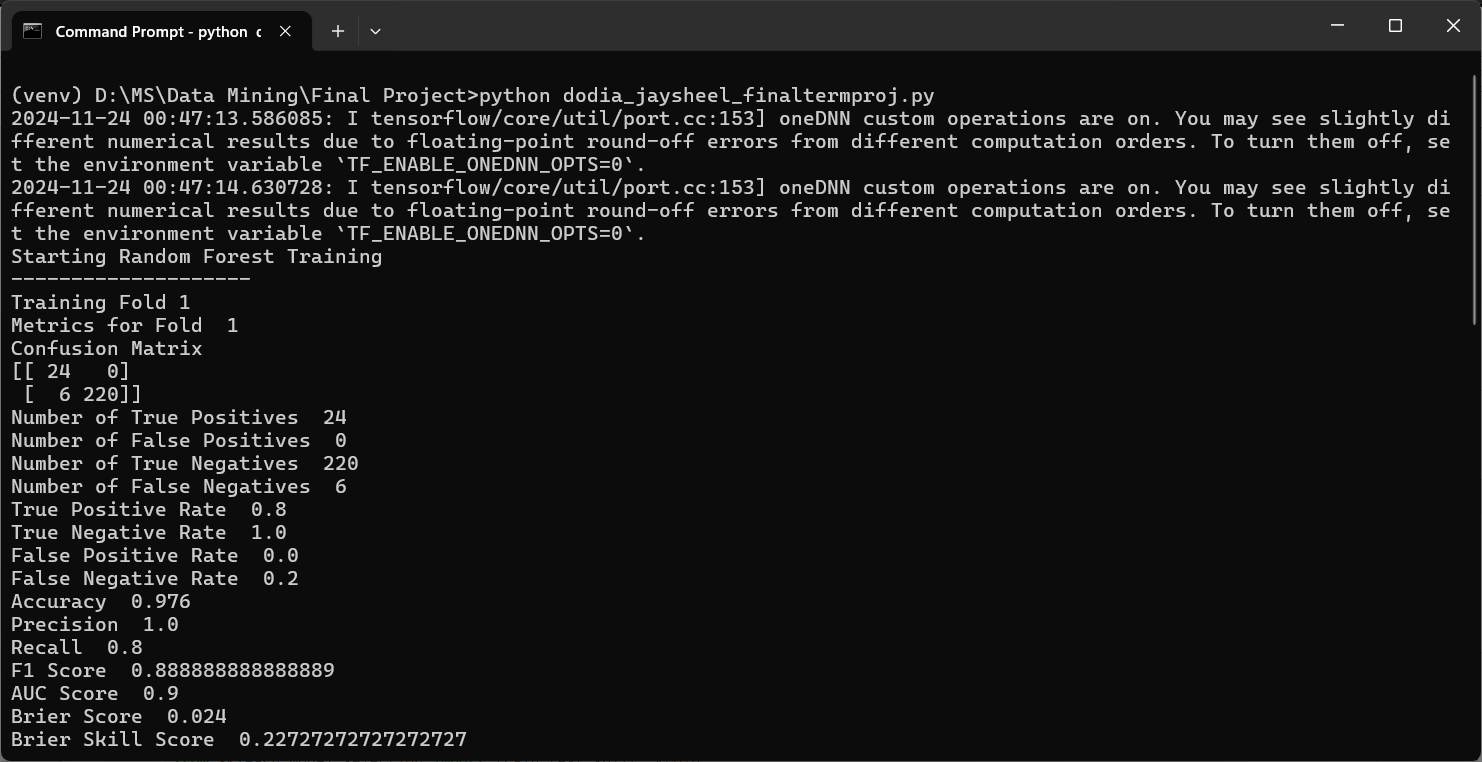

In [78]:
Image('ss/5.png')

# Implementation

## Import Libraries

Import all the required libraries to carry out preprocessing tasks, implement Machine Learning algorithms and build LSTM neural network.

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix, brier_score_loss, roc_curve, roc_auc_score

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

In [80]:
# Set random seed
np.random.seed(42)

## Load Dataset

* Loading the dataset to our pandas dataframe
* The dataset consists of 2 main columns: Messages and Category
* Message: Contains the data or text of our message
* Category: Specifies if the message is a spam or a ham

In [81]:
df = pd.read_csv("./dataset/spam.csv", encoding="latin-1")
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [82]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

## Preprocess Columns

In [83]:
cols_to_drop = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"]
df = df.drop(cols_to_drop, axis=1)

In [84]:
df.columns = ["Category", "Message"]

In [85]:
df.head()

Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

## Reducing dataset size

Random sampling our dataset to extract 2,500 rows at random and reduce the size of our dataset.

In [86]:
df = df.sample(2500)

In [87]:
df.shape

(2500, 2)

## Label Encoding

Converting target variable to 0 and 1 instead of the text `ham` and `spam`. Set the target variable to 1 if the category is "spam" and 0 if the category is "ham"

In [88]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

Category                                            Message  spam
3245      ham  Funny fact Nobody teaches volcanoes 2 erupt, t...     0
944       ham  I sent my scores to sophas and i had to do sec...     0
1044     spam  We know someone who you know that fancies you....     1
2484      ham  Only if you promise your getting out as SOON a...     0
812      spam  Congratulations ur awarded either å£500 of CD ...     1

In [89]:
df.sample(1)

Category                                            Message  spam
1556      ham  Good sleep is about rhythm. The person has to ...     0

## Preprocess - For ML

### Count Vectorizer

Count Vectorizer converts a collection of text documents (a dataframe of rows in our case) to a matrix of token count.

In [90]:
cv = CountVectorizer()
X_cv = cv.fit_transform(df['Message'])
y = df['spam']

## Functions to Calculate Metrics

### Function to create the confusion matrix

In [91]:
def create_cm(tp, tn, fp, fn):
    cm = np.array([[tp, fp], [fn, tn]])
    return cm

### Function to calculate Brier Skill Score (BSS)

In [92]:
def calc_bss(y_test, bs):
    mean = np.mean(y_test)
    brier_ref = np.mean((y_test - mean) ** 2)
    bss = bs/brier_ref
    return bss

### Function to calculate all metrics

In [93]:
def calc_all_metrics(y_test, y_pred, i):
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Rate
    tpr = tp / (tp + fn)
    tnr = tn / (tn + fp)
    fpr = fp / (fp + tn)
    fnr = fn / (fn + tp)

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = (2 * precision * recall) / (precision + recall)
    
    auc_score = roc_auc_score(y_test, y_pred)

    brier = brier_score_loss(y_test, y_pred)
    brier_skill_score = calc_bss(y_test, brier)

    cm = create_cm(tp, tn, fp, fn)
    
    print("Metrics for Fold ", i)
    print("-"*10)
    print("Confusion Matrix for Fold ", i)
    print(cm)
    print("Number of True Positives ", tp)
    print("Number of False Positives ", fp)
    print("Number of True Negatives ", tn)
    print("Number of False Negatives ", fn)
    print("True Positive Rate ", tpr)
    print("True Negative Rate ", tnr)
    print("False Positive Rate ", fpr)
    print("False Negative Rate ", fnr)
    print("Accuracy ", accuracy)
    print("Precision ", precision)
    print("Recall ", recall)
    print("F1 Score ", f1)
    print("AUC Score ", auc_score)
    print("Brier Score ", brier)
    print("Brier Skill Score ", brier_skill_score)
    print(f"Training for fold {i} completed")
    print("\n")
    
    
    fold = f"Fold {i}"
    return [fold, tp, tn, fp, fn, tpr, tnr, fpr, fnr, accuracy, precision, recall, f1, auc_score, brier, brier_skill_score]

## Plotting Function

Function to plot the AUC-ROC Curve for each fold of the model

In [94]:
def plot_roc_curves_in_grid(roc_data, model_name):
    n_rows = int(np.ceil(len(roc_data) / 3))
    fig, axes = plt.subplots(n_rows, 3, figsize=(10, n_rows * 3))
    axes = axes.flatten()  # Flatten the axes to make indexing easier

    for i, (fpr, tpr, auc_score) in enumerate(roc_data):
        ax = axes[i]
        ax.plot(fpr, tpr, label=f"ROC Curve (AUC) score {auc_score:.2f}")
        ax.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line (random classifier)
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title(f'{model_name} Fold {i + 1} ROC Curve')
        
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout(pad=3.0)
    plt.show()

## Creating 10-Fold

The dataset is divided into 10 equal parts (called folds), where each fold is used once as a test set while the remaining 9 folds are used as the training set.

In [95]:
N_SPLITS = 10
kf = KFold(n_splits=N_SPLITS, shuffle=True, random_state=42)

## Random Forest Classifier

In [96]:
rf_metrics = []
rf_roc_data = []

print("-"*20)
print("Starting Random Forest Training")
print("-"*20)

# Loop through the 10Fold splits
for i, (train_index, test_index) in enumerate(kf.split(X_cv), start=1):
    # Splitting the data into train and test split
    X_train, X_test = X_cv[train_index], X_cv[test_index] # type: ignore
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Training Fold {i}")
    
    # Training the model
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    # Calculating the AUC-ROC curve and score
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    rf_roc_data.append((fpr, tpr, auc_score))
    
    # Calculate all the metrics and store them
    rf_metrics.append(calc_all_metrics(y_test, y_pred, i))


--------------------
Starting Random Forest Training
--------------------
Training Fold 1
Metrics for Fold  1
----------
Confusion Matrix for Fold  1
[[ 24   0]
 [  6 220]]
Number of True Positives  24
Number of False Positives  0
Number of True Negatives  220
Number of False Negatives  6
True Positive Rate  0.8
True Negative Rate  1.0
False Positive Rate  0.0
False Negative Rate  0.2
Accuracy  0.976
Precision  1.0
Recall  0.8
F1 Score  0.888888888888889
AUC Score  0.9
Brier Score  0.024
Brier Skill Score  0.22727272727272727
Training for fold 1 completed


Training Fold 2
Metrics for Fold  2
----------
Confusion Matrix for Fold  2
[[ 22   0]
 [  7 221]]
Number of True Positives  22
Number of False Positives  0
Number of True Negatives  221
Number of False Negatives  7
True Positive Rate  0.7586206896551724
True Negative Rate  1.0
False Positive Rate  0.0
False Negative Rate  0.2413793103448276
Accuracy  0.972
Precision  1.0
Recall  0.7586206896551724
F1 Score  0.8627450980392156
AUC S

In [97]:
# Add model name to column
for i, metric in enumerate(rf_metrics):
    metric.insert(0, 'Random Forest')

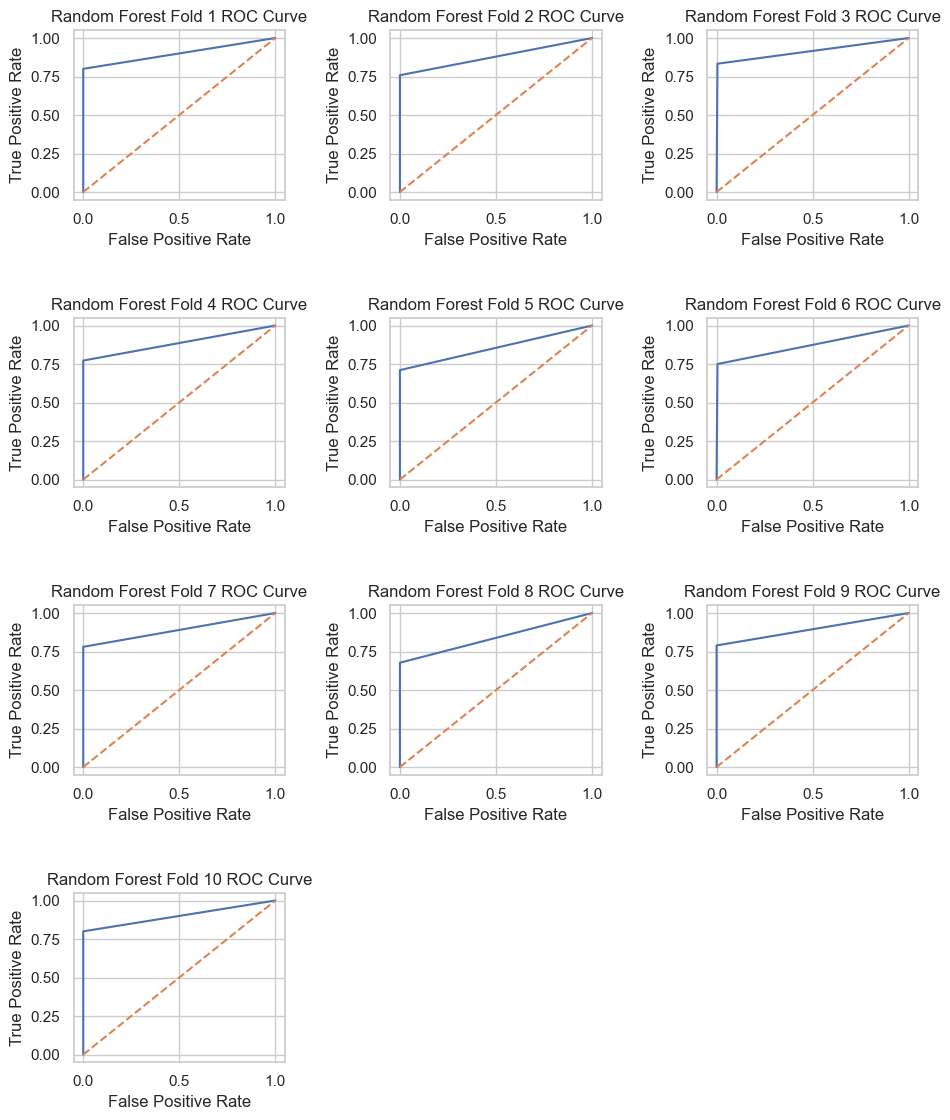

In [98]:
plot_roc_curves_in_grid(rf_roc_data, "Random Forest")

## SVM

In [99]:
svm_metrics = []
svm_roc_data = []

print("-"*20)
print("Starting SVM Training")
print("-"*20)

# Loop through the KFold splits
for i, (train_index, test_index) in enumerate(kf.split(X_cv), start=1):
    # Splitting the data into train and test split
    X_train, X_test = X_cv[train_index], X_cv[test_index] # type: ignore
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print(f"Training Fold {i}! ", end='')
    # Training the model
    svm = SVC()
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)

    # Calculating the AUC-ROC curve and score
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    svm_roc_data.append((fpr, tpr, auc_score))
    
    # Calculate metrics and storing them
    svm_metrics.append(calc_all_metrics(y_test, y_pred, i))

--------------------
Starting SVM Training
--------------------
Training Fold 1! Metrics for Fold  1
----------
Confusion Matrix for Fold  1
[[ 26   0]
 [  4 220]]
Number of True Positives  26
Number of False Positives  0
Number of True Negatives  220
Number of False Negatives  4
True Positive Rate  0.8666666666666667
True Negative Rate  1.0
False Positive Rate  0.0
False Negative Rate  0.13333333333333333
Accuracy  0.984
Precision  1.0
Recall  0.8666666666666667
F1 Score  0.9285714285714286
AUC Score  0.9333333333333333
Brier Score  0.016
Brier Skill Score  0.15151515151515152
Training for fold 1 completed


Training Fold 2! Metrics for Fold  2
----------
Confusion Matrix for Fold  2
[[ 25   0]
 [  4 221]]
Number of True Positives  25
Number of False Positives  0
Number of True Negatives  221
Number of False Negatives  4
True Positive Rate  0.8620689655172413
True Negative Rate  1.0
False Positive Rate  0.0
False Negative Rate  0.13793103448275862
Accuracy  0.984
Precision  1.0
Recall

In [100]:
# add the model name to the metrics
for i, metric in enumerate(svm_metrics):
    metric.insert(0, 'SVM')

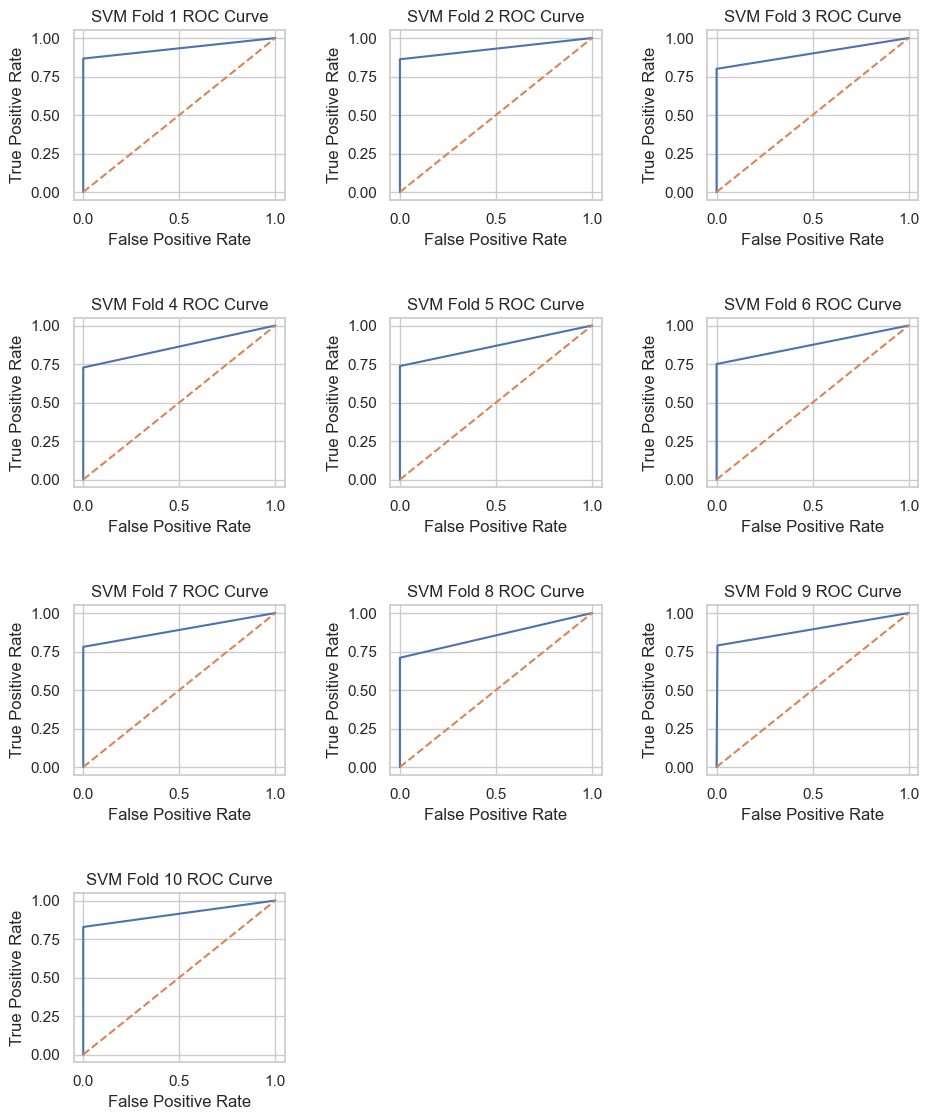

In [101]:
plot_roc_curves_in_grid(svm_roc_data, "SVM")

## Preprocess for LSTM

In [102]:
X = df['Message']
y = df['spam']

Break the text into tokens and make them suitable for training an LSTM.

In [103]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)
X_tok= tokenizer.texts_to_sequences(X)

# Padding the data
X_pad = pad_sequences(X_tok)

## LSTM

### Function to build LSTM model 

In [104]:
def build_model(X_train_pad):
    # Training the model
    model = Sequential()
    model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=32))
    model.add(LSTM(32))
    model.add(Dense(1, activation='sigmoid'))
    return model

### Executing

In [105]:
lstm_metrics = []
lstm_roc_data = []
print("-"*20)
print("Starting LSTM Training")
print("-"*20)
for i, (train_index, test_index) in enumerate(kf.split(X_pad), start=1):
    # Splitting the data into train and test split
    X_train, X_test = X_pad[train_index], X_pad[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # train the LSTM model
    model = build_model(X_train)

    model.compile(loss='binary_crossentropy', optimizer='adam')
    
    model.fit(X_train, y_train, epochs=2, batch_size=32, verbose=0)
    y_pred = model.predict(X_test, verbose=0) > 0.5

    # Calculating the AUC-ROC score and curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    auc_score = roc_auc_score(y_test, y_pred)
    lstm_roc_data.append((fpr, tpr, auc_score))

    # calculating the metrics and storing them
    lstm_metrics.append(calc_all_metrics(y_test, y_pred, i))
   

--------------------
Starting LSTM Training
--------------------
Metrics for Fold  1
----------
Confusion Matrix for Fold  1
[[ 26   1]
 [  4 219]]
Number of True Positives  26
Number of False Positives  1
Number of True Negatives  219
Number of False Negatives  4
True Positive Rate  0.8666666666666667
True Negative Rate  0.9954545454545455
False Positive Rate  0.004545454545454545
False Negative Rate  0.13333333333333333
Accuracy  0.98
Precision  0.9629629629629629
Recall  0.8666666666666667
F1 Score  0.912280701754386
AUC Score  0.931060606060606
Brier Score  0.02
Brier Skill Score  0.1893939393939394
Training for fold 1 completed


Metrics for Fold  2
----------
Confusion Matrix for Fold  2
[[ 27   0]
 [  2 221]]
Number of True Positives  27
Number of False Positives  0
Number of True Negatives  221
Number of False Negatives  2
True Positive Rate  0.9310344827586207
True Negative Rate  1.0
False Positive Rate  0.0
False Negative Rate  0.06896551724137931
Accuracy  0.992
Precision  1

In [106]:
for i, metric in enumerate(lstm_metrics):
    metric.insert(0, 'LSTM')

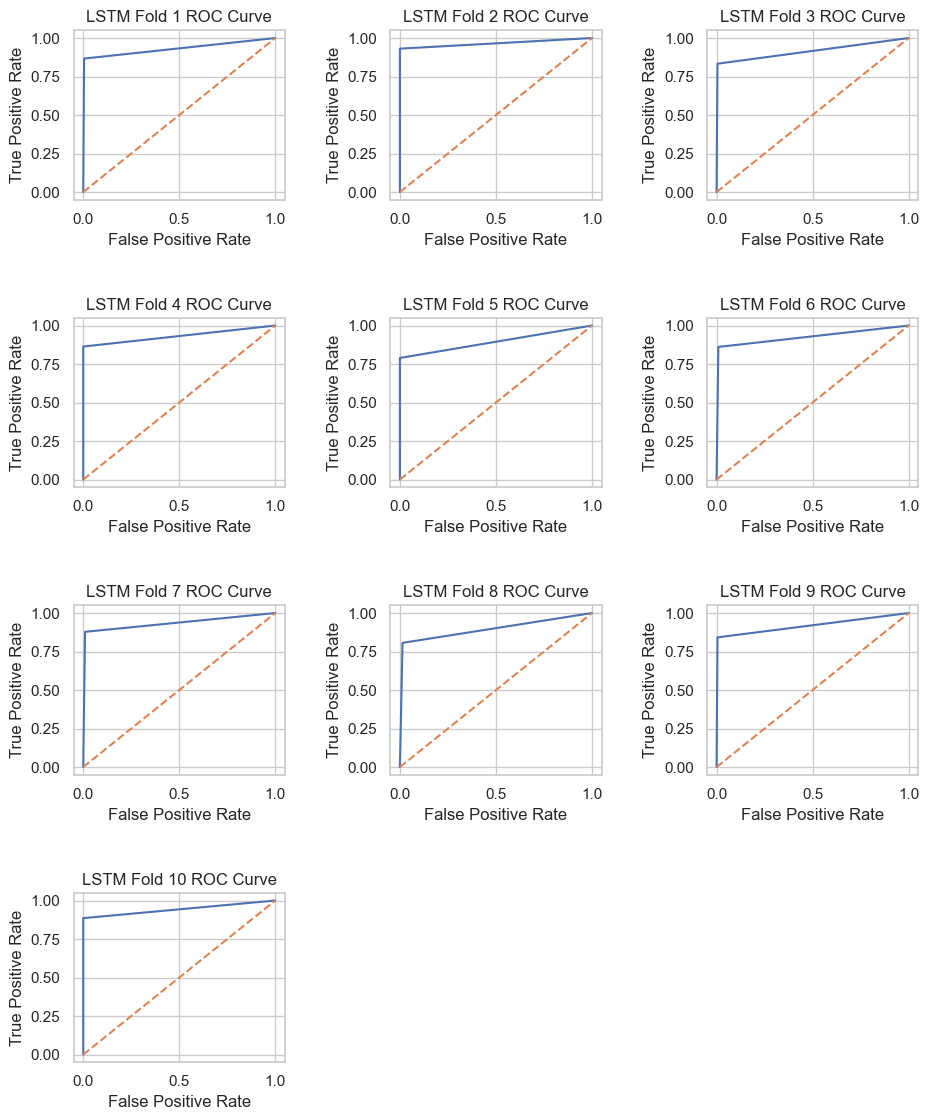

In [107]:
plot_roc_curves_in_grid(lstm_roc_data, "LSTM")

## Tabulate

Store the data into table format using pandas dataframe 

In [108]:
columns = ['ModelName', 'Fold', 'TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 
           'FPR', 'FNR', 'Accuracy', 'Precision', 
           'Recall', 'F1', 'AUC', 'Brier', 'Brier Skill Score']
rf_metrics_df = pd.DataFrame(rf_metrics, columns=columns)
svm_metrics_df = pd.DataFrame(svm_metrics, columns=columns)
lstm_metrics_df = pd.DataFrame(lstm_metrics, columns=columns)

### Metrics in Table Format

#### Random Forest Classifier 

In [109]:
rf_metrics_df

ModelName     Fold  TP   TN  FP  FN       TPR       TNR       FPR  \
0  Random Forest   Fold 1  24  220   0   6  0.800000  1.000000  0.000000   
1  Random Forest   Fold 2  22  221   0   7  0.758621  1.000000  0.000000   
2  Random Forest   Fold 3  25  219   1   5  0.833333  0.995455  0.004545   
3  Random Forest   Fold 4  17  228   0   5  0.772727  1.000000  0.000000   
4  Random Forest   Fold 5  27  212   0  11  0.710526  1.000000  0.000000   
5  Random Forest   Fold 6  27  213   1   9  0.750000  0.995327  0.004673   
6  Random Forest   Fold 7  32  209   0   9  0.780488  1.000000  0.000000   
7  Random Forest   Fold 8  21  219   0  10  0.677419  1.000000  0.000000   
8  Random Forest   Fold 9  30  212   0   8  0.789474  1.000000  0.000000   
9  Random Forest  Fold 10  28  215   0   7  0.800000  1.000000  0.000000   

        FNR  Accuracy  Precision    Recall        F1       AUC  Brier  \
0  0.200000     0.976   1.000000  0.800000  0.888889  0.900000  0.024   
1  0.241379     0.972   1.000000  0.758621  0.862745  0.879310  0.028   
2  0.166667     0.976   0.961538  0.833333  0.892857  0.914394  0.024   
3  0.227273     0.980   1.000000  0.772727  0.871795  0.886364  0.020   
4  0.289474     0.956   1.000000  0.710526  0.830769  0.855263  0.044   
5  0.250000     0.960   0.964286  0.750000  0.843750  0.872664  0.040   
6  0.219512     0.964   1.000000  0.780488  0.876712  0.890244  0.036   
7  0.322581     0.960   1.000000  0.677419  0.807692  0.838710  0.040   
8  0.210526     0.968   1.000000  0.789474  0.882353  0.894737  0.032   
9  0.200000     0.972   1.000000  0.800000  0.888889  0.900000  0.028   

   Brier Skill Score  
0           0.227273  
1           0.273054  
2           0.227273  
3           0.249203  
4           0.341360  
5           0.324507  
6           0.262574  
7           0.368243  
8           0.248262  
9           0.232558

#### SVM

In [110]:
svm_metrics_df

ModelName     Fold  TP   TN  FP  FN       TPR       TNR       FPR       FNR  \
0       SVM   Fold 1  26  220   0   4  0.866667  1.000000  0.000000  0.133333   
1       SVM   Fold 2  25  221   0   4  0.862069  1.000000  0.000000  0.137931   
2       SVM   Fold 3  24  220   0   6  0.800000  1.000000  0.000000  0.200000   
3       SVM   Fold 4  16  228   0   6  0.727273  1.000000  0.000000  0.272727   
4       SVM   Fold 5  28  212   0  10  0.736842  1.000000  0.000000  0.263158   
5       SVM   Fold 6  27  214   0   9  0.750000  1.000000  0.000000  0.250000   
6       SVM   Fold 7  32  209   0   9  0.780488  1.000000  0.000000  0.219512   
7       SVM   Fold 8  22  219   0   9  0.709677  1.000000  0.000000  0.290323   
8       SVM   Fold 9  30  211   1   8  0.789474  0.995283  0.004717  0.210526   
9       SVM  Fold 10  29  215   0   6  0.828571  1.000000  0.000000  0.171429   

   Accuracy  Precision    Recall        F1       AUC  Brier  Brier Skill Score  
0     0.984   1.000000  0.866667  0.928571  0.933333  0.016           0.151515  
1     0.984   1.000000  0.862069  0.925926  0.931034  0.016           0.156031  
2     0.976   1.000000  0.800000  0.888889  0.900000  0.024           0.227273  
3     0.976   1.000000  0.727273  0.842105  0.863636  0.024           0.299043  
4     0.960   1.000000  0.736842  0.848485  0.868421  0.040           0.310328  
5     0.964   1.000000  0.750000  0.857143  0.875000  0.036           0.292056  
6     0.964   1.000000  0.780488  0.876712  0.890244  0.036           0.262574  
7     0.964   1.000000  0.709677  0.830189  0.854839  0.036           0.331418  
8     0.964   0.967742  0.789474  0.869565  0.892378  0.036           0.279295  
9     0.976   1.000000  0.828571  0.906250  0.914286  0.024           0.199336

#### LSTM

In [111]:
lstm_metrics_df

ModelName     Fold  TP   TN  FP  FN       TPR       TNR       FPR       FNR  \
0      LSTM   Fold 1  26  219   1   4  0.866667  0.995455  0.004545  0.133333   
1      LSTM   Fold 2  27  221   0   2  0.931034  1.000000  0.000000  0.068966   
2      LSTM   Fold 3  25  219   1   5  0.833333  0.995455  0.004545  0.166667   
3      LSTM   Fold 4  19  228   0   3  0.863636  1.000000  0.000000  0.136364   
4      LSTM   Fold 5  30  212   0   8  0.789474  1.000000  0.000000  0.210526   
5      LSTM   Fold 6  31  212   2   5  0.861111  0.990654  0.009346  0.138889   
6      LSTM   Fold 7  36  207   2   5  0.878049  0.990431  0.009569  0.121951   
7      LSTM   Fold 8  25  216   3   6  0.806452  0.986301  0.013699  0.193548   
8      LSTM   Fold 9  32  211   1   6  0.842105  0.995283  0.004717  0.157895   
9      LSTM  Fold 10  31  215   0   4  0.885714  1.000000  0.000000  0.114286   

   Accuracy  Precision    Recall        F1       AUC  Brier  Brier Skill Score  
0     0.980   0.962963  0.866667  0.912281  0.931061  0.020           0.189394  
1     0.992   1.000000  0.931034  0.964286  0.965517  0.008           0.078015  
2     0.976   0.961538  0.833333  0.892857  0.914394  0.024           0.227273  
3     0.988   1.000000  0.863636  0.926829  0.931818  0.012           0.149522  
4     0.968   1.000000  0.789474  0.882353  0.894737  0.032           0.248262  
5     0.972   0.939394  0.861111  0.898551  0.925883  0.028           0.227155  
6     0.972   0.947368  0.878049  0.911392  0.934240  0.028           0.204225  
7     0.964   0.892857  0.806452  0.847458  0.896376  0.036           0.331418  
8     0.972   0.969697  0.842105  0.901408  0.918694  0.028           0.217229  
9     0.984   1.000000  0.885714  0.939394  0.942857  0.016           0.132890

In [112]:
# combine all the dataframes
all_metrics = pd.concat([rf_metrics_df, svm_metrics_df, lstm_metrics_df], axis=0)
all_metrics.reset_index(drop=True, inplace=True)
all_metrics

ModelName     Fold  TP   TN  FP  FN       TPR       TNR       FPR  \
0   Random Forest   Fold 1  24  220   0   6  0.800000  1.000000  0.000000   
1   Random Forest   Fold 2  22  221   0   7  0.758621  1.000000  0.000000   
2   Random Forest   Fold 3  25  219   1   5  0.833333  0.995455  0.004545   
3   Random Forest   Fold 4  17  228   0   5  0.772727  1.000000  0.000000   
4   Random Forest   Fold 5  27  212   0  11  0.710526  1.000000  0.000000   
5   Random Forest   Fold 6  27  213   1   9  0.750000  0.995327  0.004673   
6   Random Forest   Fold 7  32  209   0   9  0.780488  1.000000  0.000000   
7   Random Forest   Fold 8  21  219   0  10  0.677419  1.000000  0.000000   
8   Random Forest   Fold 9  30  212   0   8  0.789474  1.000000  0.000000   
9   Random Forest  Fold 10  28  215   0   7  0.800000  1.000000  0.000000   
10            SVM   Fold 1  26  220   0   4  0.866667  1.000000  0.000000   
11            SVM   Fold 2  25  221   0   4  0.862069  1.000000  0.000000   
12            SVM   Fold 3  24  220   0   6  0.800000  1.000000  0.000000   
13            SVM   Fold 4  16  228   0   6  0.727273  1.000000  0.000000   
14            SVM   Fold 5  28  212   0  10  0.736842  1.000000  0.000000   
15            SVM   Fold 6  27  214   0   9  0.750000  1.000000  0.000000   
16            SVM   Fold 7  32  209   0   9  0.780488  1.000000  0.000000   
17            SVM   Fold 8  22  219   0   9  0.709677  1.000000  0.000000   
18            SVM   Fold 9  30  211   1   8  0.789474  0.995283  0.004717   
19            SVM  Fold 10  29  215   0   6  0.828571  1.000000  0.000000   
20           LSTM   Fold 1  26  219   1   4  0.866667  0.995455  0.004545   
21           LSTM   Fold 2  27  221   0   2  0.931034  1.000000  0.000000   
22           LSTM   Fold 3  25  219   1   5  0.833333  0.995455  0.004545   
23           LSTM   Fold 4  19  228   0   3  0.863636  1.000000  0.000000   
24           LSTM   Fold 5  30  212   0   8  0.789474  1.000000  0.000000   
25           LSTM   Fold 6  31  212   2   5  0.861111  0.990654  0.009346   
26           LSTM   Fold 7  36  207   2   5  0.878049  0.990431  0.009569   
27           LSTM   Fold 8  25  216   3   6  0.806452  0.986301  0.013699   
28           LSTM   Fold 9  32  211   1   6  0.842105  0.995283  0.004717   
29           LSTM  Fold 10  31  215   0   4  0.885714  1.000000  0.000000   

         FNR  Accuracy  Precision    Recall        F1       AUC  Brier  \
0   0.200000     0.976   1.000000  0.800000  0.888889  0.900000  0.024   
1   0.241379     0.972   1.000000  0.758621  0.862745  0.879310  0.028   
2   0.166667     0.976   0.961538  0.833333  0.892857  0.914394  0.024   
3   0.227273     0.980   1.000000  0.772727  0.871795  0.886364  0.020   
4   0.289474     0.956   1.000000  0.710526  0.830769  0.855263  0.044   
5   0.250000     0.960   0.964286  0.750000  0.843750  0.872664  0.040   
6   0.219512     0.964   1.000000  0.780488  0.876712  0.890244  0.036   
7   0.322581     0.960   1.000000  0.677419  0.807692  0.838710  0.040   
8   0.210526     0.968   1.000000  0.789474  0.882353  0.894737  0.032   
9   0.200000     0.972   1.000000  0.800000  0.888889  0.900000  0.028   
10  0.133333     0.984   1.000000  0.866667  0.928571  0.933333  0.016   
11  0.137931     0.984   1.000000  0.862069  0.925926  0.931034  0.016   
12  0.200000     0.976   1.000000  0.800000  0.888889  0.900000  0.024   
13  0.272727     0.976   1.000000  0.727273  0.842105  0.863636  0.024   
14  0.263158     0.960   1.000000  0.736842  0.848485  0.868421  0.040   
15  0.250000     0.964   1.000000  0.750000  0.857143  0.875000  0.036   
16  0.219512     0.964   1.000000  0.780488  0.876712  0.890244  0.036   
17  0.290323     0.964   1.000000  0.709677  0.830189  0.854839  0.036   
18  0.210526     0.964   0.967742  0.789474  0.869565  0.892378  0.036   
19  0.171429     0.976   1.000000  0.828571  0.906250  0.914286  0.024   
20  0.133333     0.980   0.962963  0.866667  0.912281  0.931061  0

In [113]:
all_metrics.shape

(30, 17)

## Calculate Mean

In [114]:
all_metrics.drop('Fold', axis=1).groupby('ModelName').mean()

TP     TN   FP   FN       TPR       TNR       FPR       FNR  \
ModelName                                                                      
LSTM           28.2  216.0  1.0  4.8  0.855758  0.995358  0.004642  0.144242   
Random Forest  25.3  216.8  0.2  7.7  0.767259  0.999078  0.000922  0.232741   
SVM            25.9  216.9  0.1  7.1  0.785106  0.999528  0.000472  0.214894   

               Accuracy  Precision    Recall        F1       AUC   Brier  \
ModelName                                                                  
LSTM             0.9768   0.967382  0.855758  0.907681  0.925558  0.0232   
Random Forest    0.9684   0.992582  0.767259  0.864645  0.883169  0.0316   
SVM              0.9712   0.996774  0.785106  0.877384  0.892317  0.0288   

               Brier Skill Score  
ModelName                         
LSTM                    0.200538  
Random Forest           0.275431  
SVM                     0.250887

### Print in terminal

In [115]:
# print in terminal
def print_all_metrics(all_metrics):
    mean_df = all_metrics.drop('Fold', axis=1).groupby('ModelName').mean()
    for col in mean_df.columns:
        print(f"Mean {col} for each model")
        print(mean_df[col])
        print("\n")
print("-"*30)
print("Mean of Metrics for each model")
print("-"*30)
print_all_metrics(all_metrics)
print("-"*30)

------------------------------
Mean of Metrics for each model
------------------------------
Mean TP for each model
ModelName
LSTM             28.2
Random Forest    25.3
SVM              25.9
Name: TP, dtype: float64


Mean TN for each model
ModelName
LSTM             216.0
Random Forest    216.8
SVM              216.9
Name: TN, dtype: float64


Mean FP for each model
ModelName
LSTM             1.0
Random Forest    0.2
SVM              0.1
Name: FP, dtype: float64


Mean FN for each model
ModelName
LSTM             4.8
Random Forest    7.7
SVM              7.1
Name: FN, dtype: float64


Mean TPR for each model
ModelName
LSTM             0.855758
Random Forest    0.767259
SVM              0.785106
Name: TPR, dtype: float64


Mean TNR for each model
ModelName
LSTM             0.995358
Random Forest    0.999078
SVM              0.999528
Name: TNR, dtype: float64


Mean FPR for each model
ModelName
LSTM             0.004642
Random Forest    0.000922
SVM              0.000472
Name: FPR, dty

# Visualization

## Plot all metrics of Random Forest Classifier for each fold

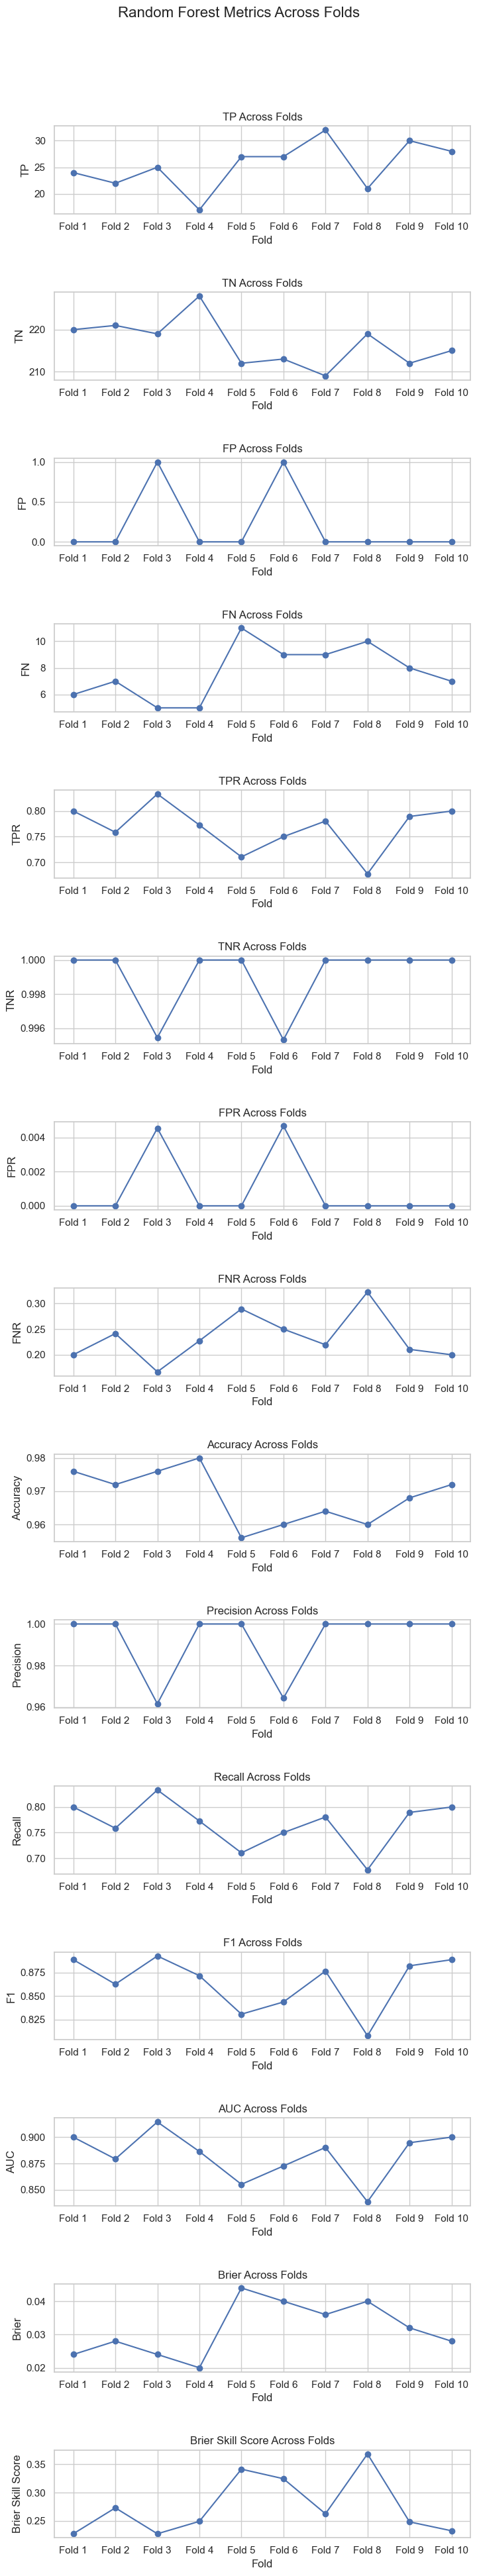

In [116]:
rf_metrics_df_plot = pd.DataFrame(rf_metrics, columns=columns)
rf_metrics_df_plot.drop('Fold', axis=1, inplace=True)
# List of metrics to plot
metrics = ['TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC', 'Brier', 'Brier Skill Score']

# Plotting the metrics for each fold
fig, axes = plt.subplots(len(metrics), 1, figsize=(8, 40))
fig.suptitle('Random Forest Metrics Across Folds', fontsize=16)

for i, metric in enumerate(metrics):
    axes[i].plot(rf_metrics_df['Fold'], rf_metrics_df[metric], marker='o')
    axes[i].set_title(f'{metric} Across Folds')
    axes[i].set_xlabel('Fold')
    axes[i].set_ylabel(metric)
    axes[i].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Plot all metrics of SVM for each fold

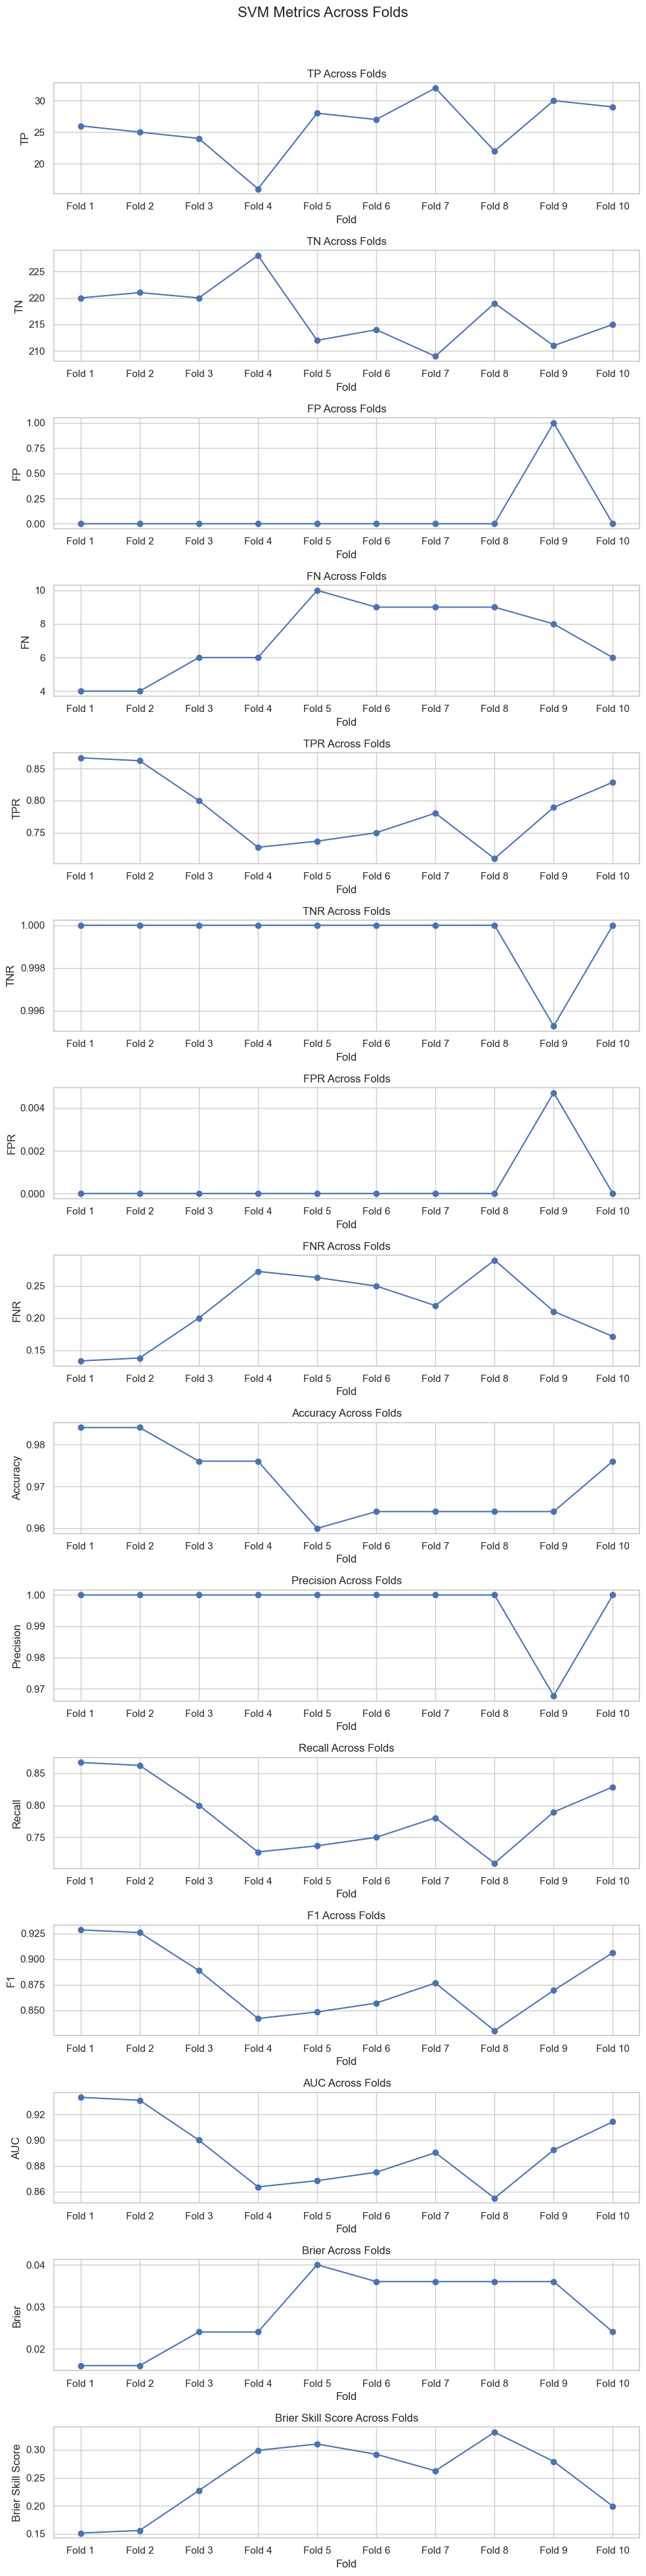

In [117]:
import matplotlib.pyplot as plt

svm_metrics_df_plot = pd.DataFrame(svm_metrics, columns=columns)
svm_metrics_df_plot.drop('Fold', axis=1, inplace=True)
# List of metrics to plot
metrics = ['TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC', 'Brier', 'Brier Skill Score']

# Plotting the metrics for each fold
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 40))
fig.suptitle('SVM Metrics Across Folds', fontsize=16)

for i, metric in enumerate(metrics):
    axes[i].plot(svm_metrics_df['Fold'], svm_metrics_df[metric], marker='o')
    axes[i].set_title(f'{metric} Across Folds')
    axes[i].set_xlabel('Fold')
    axes[i].set_ylabel(metric)
    axes[i].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Plot all metrics of LSTM for each fold

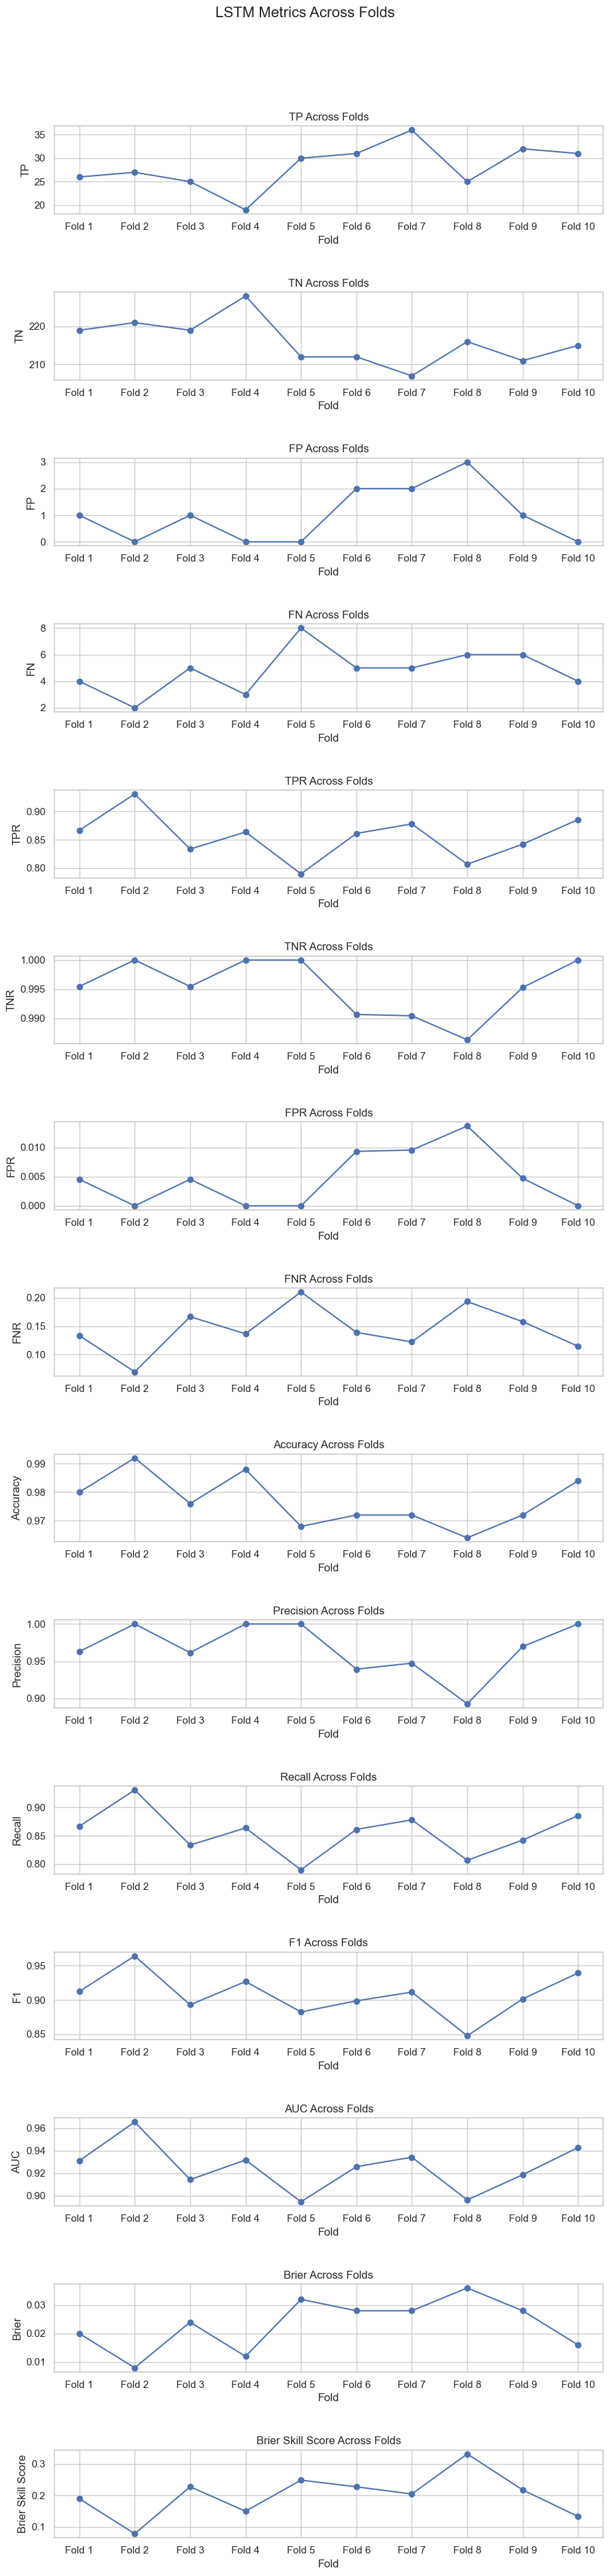

In [118]:
lstm_metrics_df_plot = pd.DataFrame(lstm_metrics, columns=columns)
lstm_metrics_df_plot.drop('Fold', axis=1, inplace=True)
# List of metrics to plot
metrics = ['TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR', 'Accuracy', 'Precision', 'Recall', 'F1', 'AUC', 'Brier', 'Brier Skill Score']

# Plotting the metrics for each fold
fig, axes = plt.subplots(len(metrics), 1, figsize=(10, 40))
fig.suptitle('LSTM Metrics Across Folds', fontsize=16)

for i, metric in enumerate(metrics):
    axes[i].plot(lstm_metrics_df['Fold'], lstm_metrics_df[metric], marker='o')
    axes[i].set_title(f'{metric} Across Folds')
    axes[i].set_xlabel('Fold')
    axes[i].set_ylabel(metric)
    axes[i].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.97], pad=3.0)
plt.show()

## BoxPlot to compare models

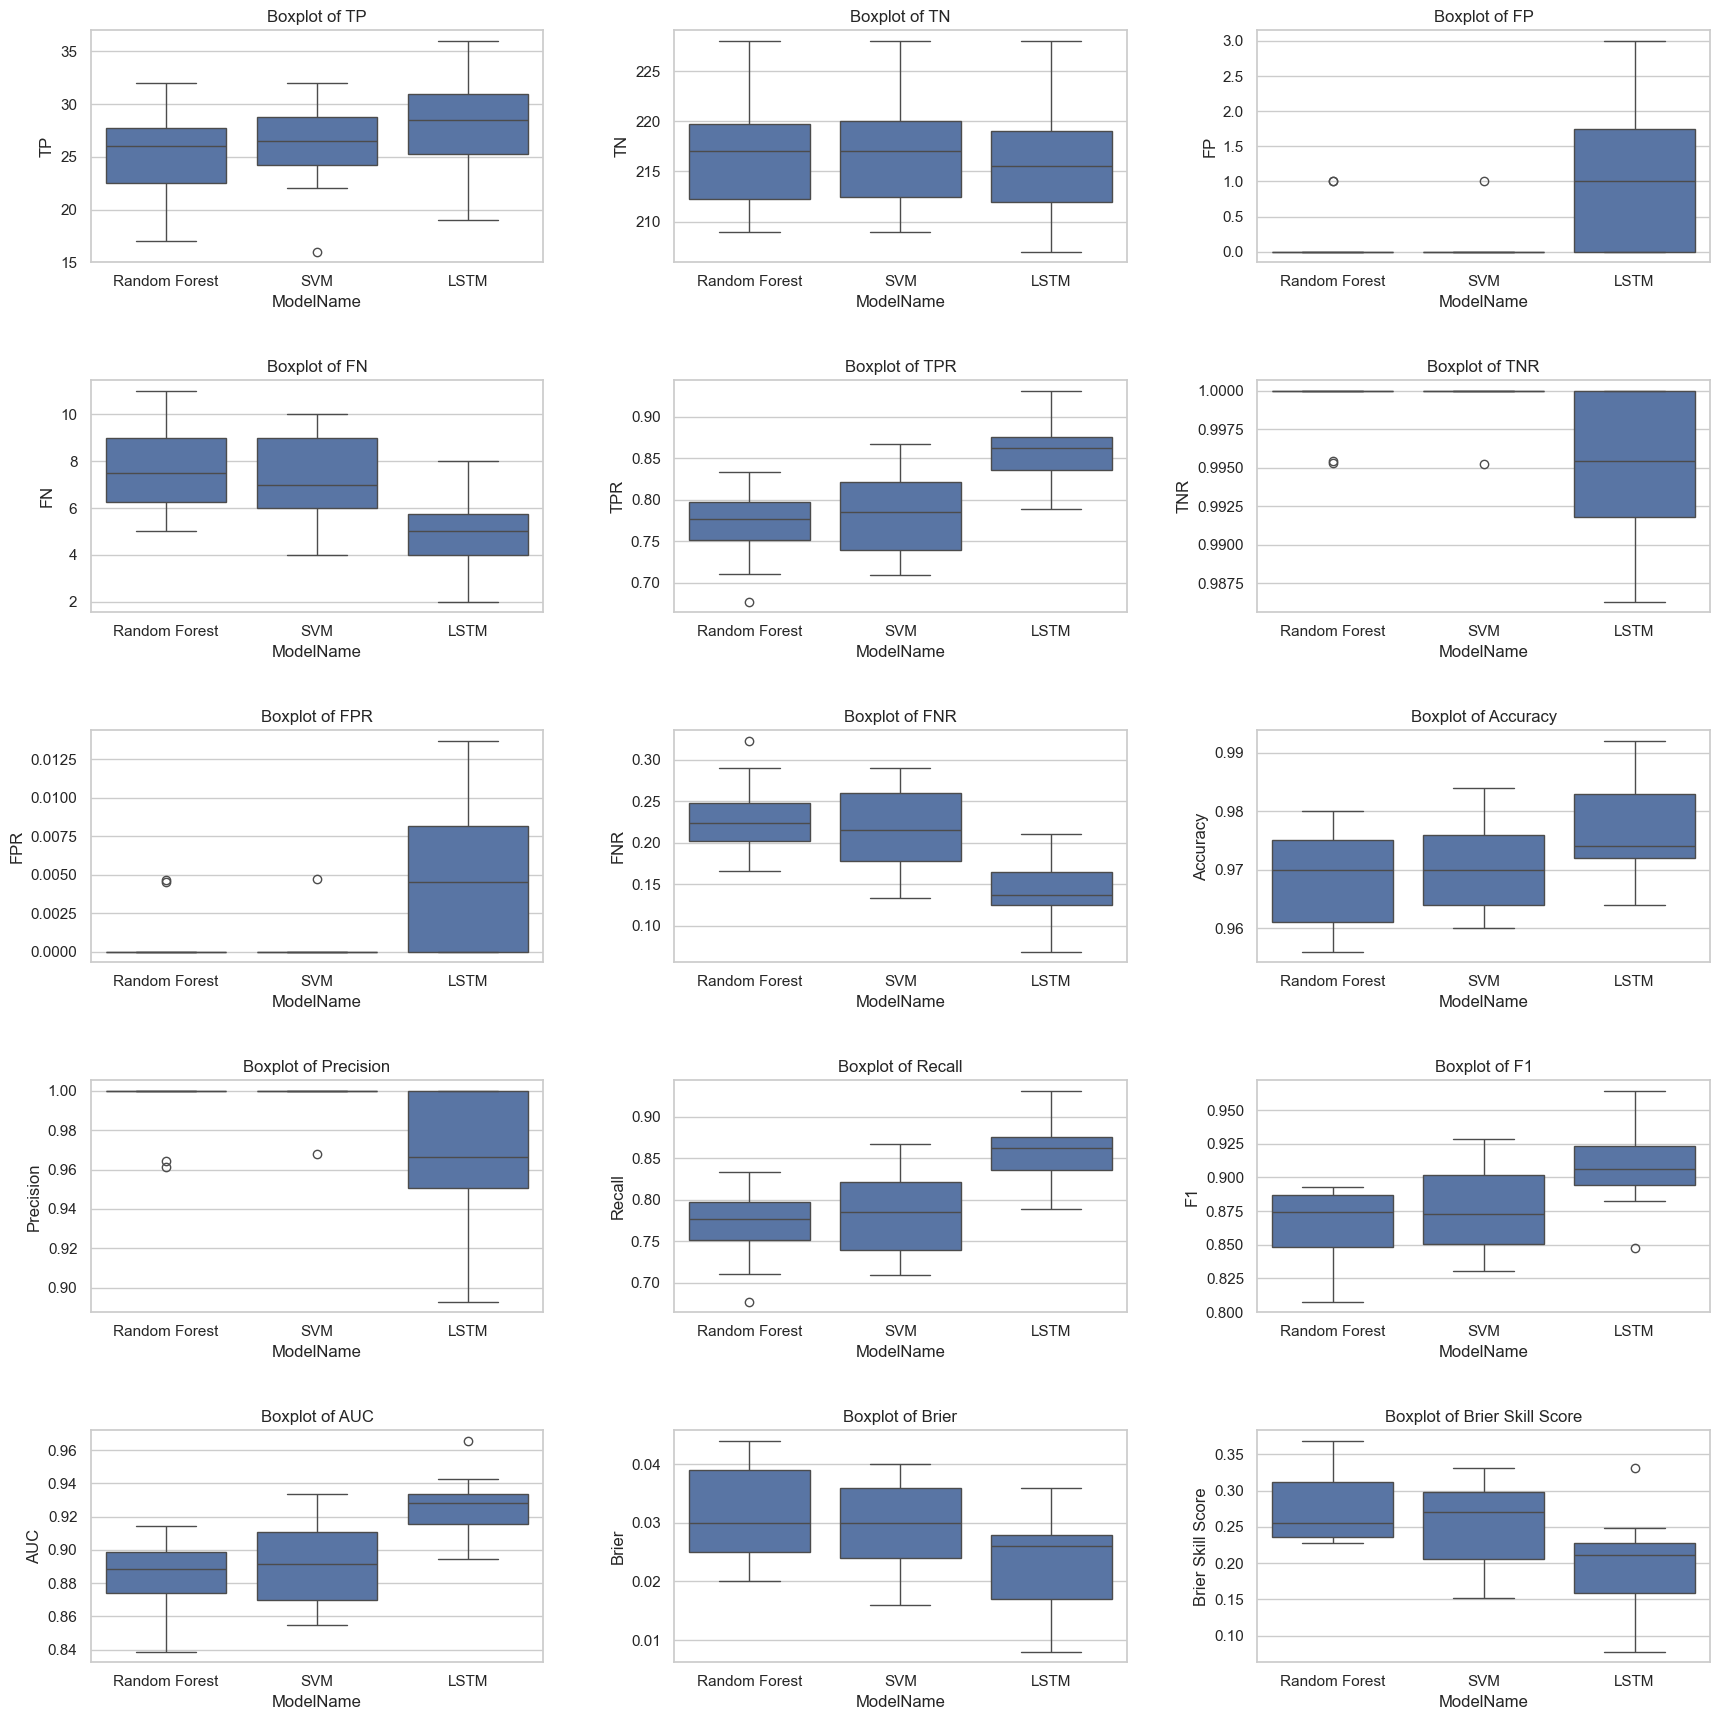

In [146]:
sns.set_theme(style="whitegrid")

# List of metrics to plot
metrics = ['TP', 'TN', 'FP', 'FN', 'TPR', 'TNR', 'FPR', 'FNR', 'Accuracy', 'Precision', 
           'Recall', 'F1', 'AUC', 'Brier', 'Brier Skill Score']

fig, axes = plt.subplots(5, 3, figsize=(18,18))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    sns.boxplot(x='ModelName', y=metric, data=all_metrics, ax=axes[i])
    axes[i].set_title(f'Boxplot of {metric}')

# Adjust the layout
plt.tight_layout(pad=3.0)
plt.show()

# Observation

1. **True Positive (TP)**: LSTM has got more TP for one of the fold than RandomForest and SVM.
2. **True Negative (NP)**: All the 3 models have somewhat similar number of TNs.
3. **False Positives (FP)**: RF and SVM have lowest count of FP compared to LSTM which shows some variation. We can also observe that there are some outliers in this case for RF and SVM.
4. **False Negatives (FN)**: RF and SVM have slightly higher number of FNs than LSTM
5. **True Positive Rate (TPR)**: LSTM has a higher TPR compared to RF and SVM, indicating better sensitivity.
6. **True Negative Rate (TNR)**: All models have similar TNR, with LSTM showing slightly more variation.
7. **False Positive Rate (FPR)**: RF and SVM have lower FPR compared to LSTM, indicating fewer false alarms.
8. **False Negative Rate (FNR)**: LSTM has a lower FNR compared to RF and SVM, indicating fewer missed detections.
9. **Accuracy**: LSTM shows higher accuracy across folds compared to RF and SVM.
10. **Precision**: All the models have similar precision, with LSTM showing slightly higher variation.
11. **Recall**: LSTM has higher recall, indicating better sensitivity.
12. **F1 Score**: LSTM has a higher F1 score, indicating a better balance between precision and recall.
13. **AUC**: LSTM has a higher AUC, indicating better overall performance.
14. **Brier Score**: LSTM has a lower Brier score, indicating better probabilistic predictions.
15. **Brier Skill Score**: LSTM has a lower Brier Skill Score, indicating better probabilistic predictions.

# Discussion

Based on the observations we can say that the LSTM model performs better than the Random Forest and SVM models in a number of important metrics. Overall accuracy, precision, recall, and F1 score are all higher for the LSTM model, along with a reduced False Negative Rate (FNR) and a higher True Positive Rate (TPR). This suggests that the LSTM model minimizes false negatives while improving the accuracy of spam message identification.

Additionally, the LSTM model's AUC (Area Under the Curve) score is higher, indicating that it performs better overall in differentiating between spam and ham messages. Furthermore, the LSTM model's lower Brier score suggests that its probabilistic predictions are more accurate.

It's crucial to remember that the Random Forest and SVM models still have their own benefits and function very effectively. For example, they are less likely to mistakenly identify ham transmissions as spam due to their reduced False Positive Rates (FPR) and they are faster to compute than LSTM models.

# Conclusion

By evaluating the metrics we can conclude that LSTM outperforms Random Forest and SVM in terms of classification accuracy and other important assessment criteria. However, LSTMs are more complex than Random Forest and SVMs to train. On the other hand, Random Forest and SVM provide consistent performance with a much easier implementation, which makes them the best options when model stability, usability, and quicker training times are more important than optimal performance. 

# Github Repository Link

jd849@njit.edu -> [Github Repository Link](https://github.com/jaysheeldodianjit/dodia_jaysheel_finalproject)

# Screenshots of implementation

The below image shows a sample of our dataset

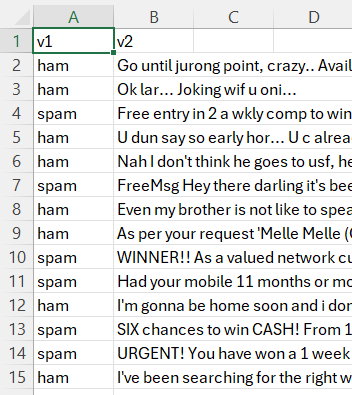

In [120]:
Image("ss/6.png")

First we load the dataset into a pandas dataframe

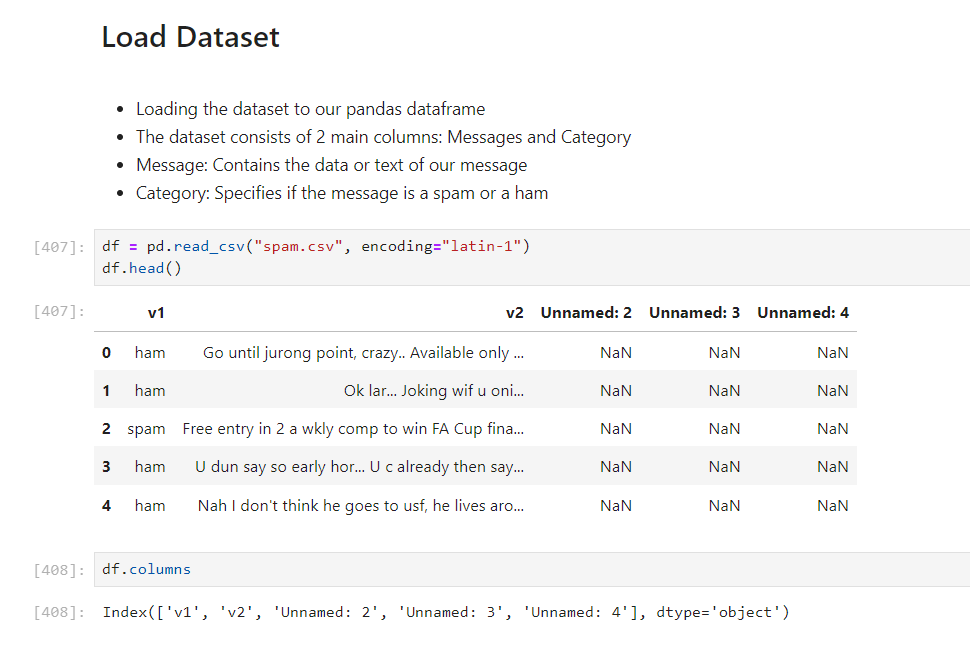

In [121]:
Image("ss/7.png")

Now we preprocess the dataset columns by pruning redundant columns and renmaing the useful columns to something more comprehnsible

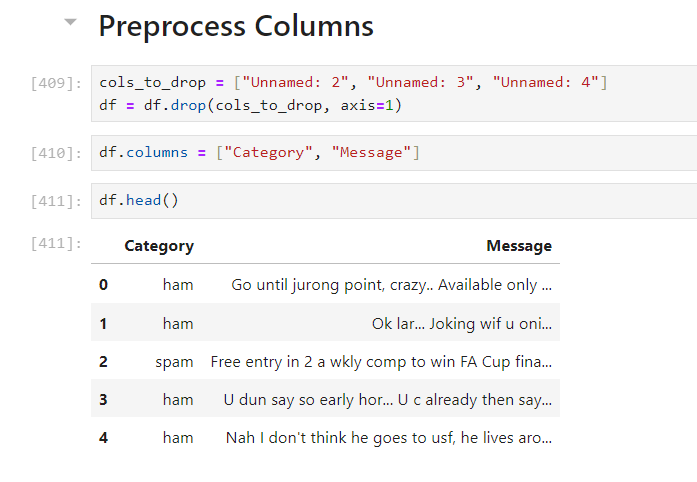

In [122]:
Image("ss/8.png")

Now we reduce the size of our dataset to 2,500 Rows by using random sampling. This reduces the amount of data that the models will train on, which in turn reduces the training time.

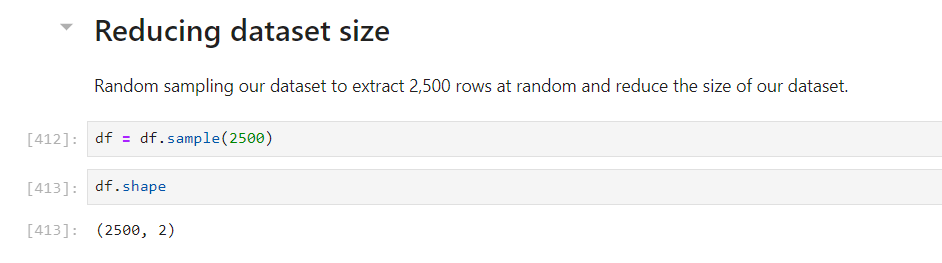

In [123]:
Image("ss/9.png")

Label Encoding is the step where we encode target variables, which are in textual format (red, blue, green...), and convert them into numerical form (0, 1, 2...). In our case we have only 2 categories in the target variable - **Spam** and **Ham**. So there are only 2 numbers after label encoding - **0** and **1**.

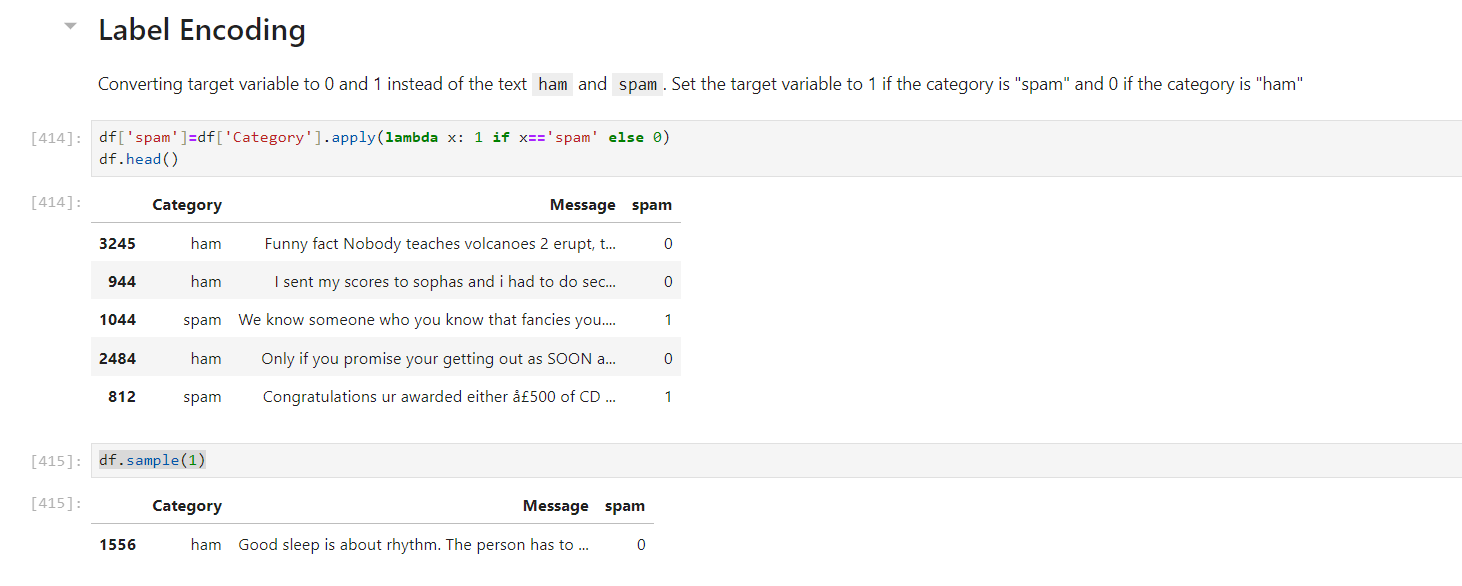

In [124]:
Image("ss/10.png")

Now we preprocess the dataset for our Machine Learning algorithms
* We use count vectorizer which converts texts to a matrix of token count.
* This is done because ML models do not train on text data but rather the numerical format of the text data.

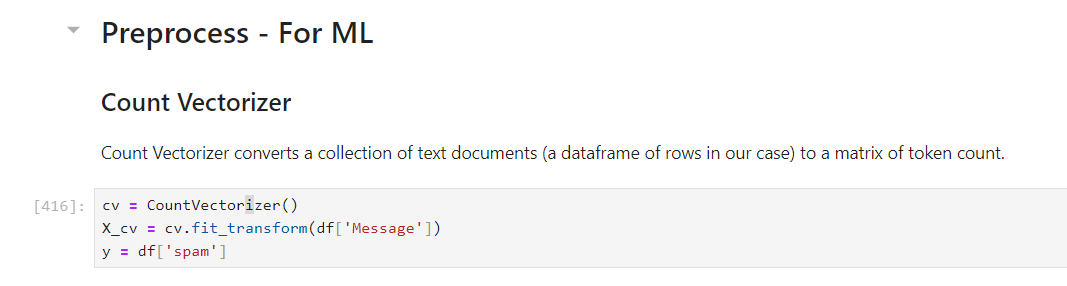

In [125]:
Image("ss/11.png")

Now we define functions to calculate the the metrics. The functions defined are:
1. **create_cm** - This function creates and returns a confusion matrix of the **tp, tn, fp and fn**.
2. **calc_bss** - This function is used to calculate and return the **Brier Skill Score**.
3. **calc_all_metrics** - This function is used to calculate and return all the metrics of the dataset. The functions **create_cm** and **calc_bss** are called over here. This function then returns the array of all the metrics that are calculated. All the metrics calculated are:
   * TP - Number of True Positives
   * FP - Number of False Positives
   * TN - Number of True Negatives
   * FN - Number of False Negatives
   * TPR - True Positive Rate
   * FPR - False Positive Rate
   * TNR - True Negative Rate
   * FNR - False Negative Rate
   * Accuracy Score
   * Precision Score
   * Recall Score
   * F1 Score
   * Brier Score
   * ROC AUC Score
   * BSS - Brier Skill Score


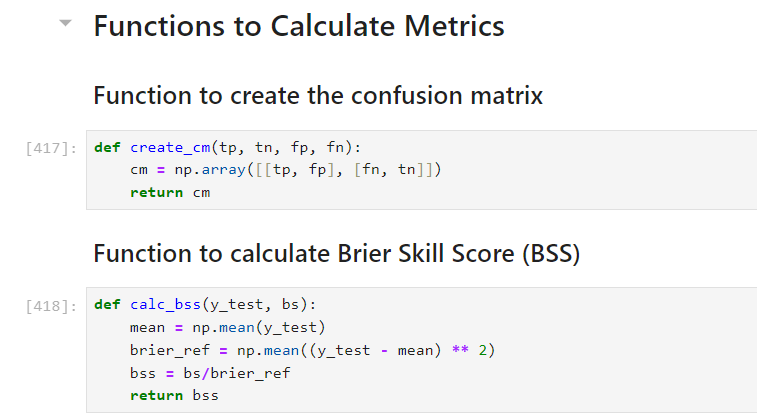

In [126]:
Image("ss/12.png")

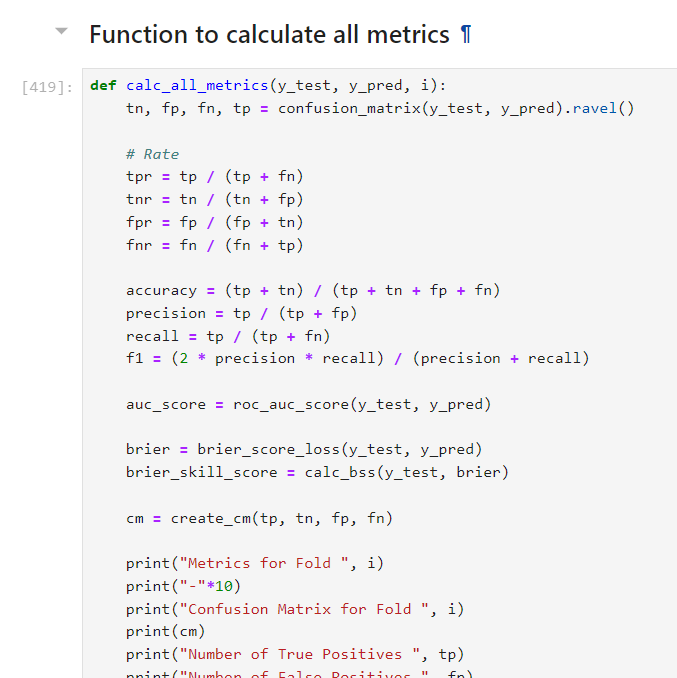

In [127]:
Image("ss/13.png")

The plotting function is defined to plot the AUC-ROC curve for each fold of the model.

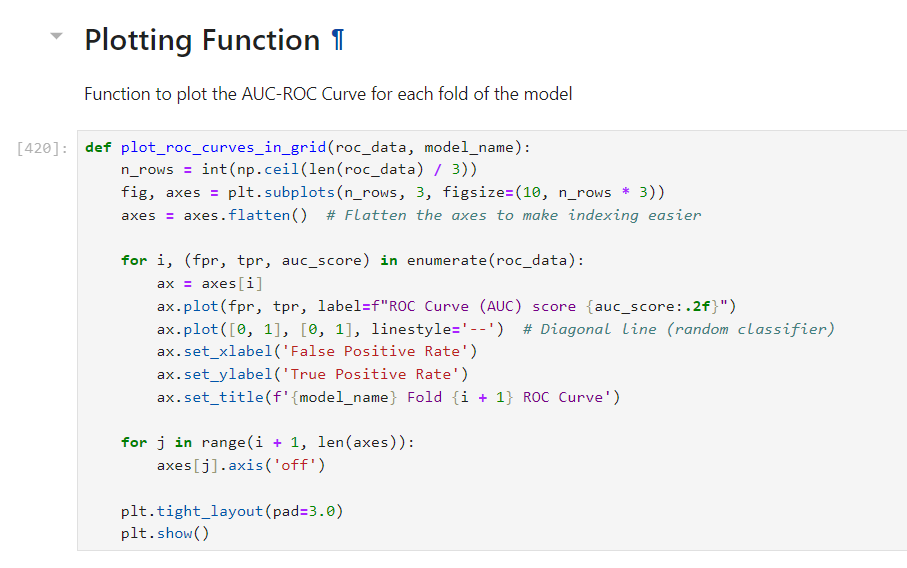

In [128]:
Image("ss/14.png")

The dataset is divided into 10 equal parts (called folds), where each fold is used once as a test set while the remaining 9 folds are used as the training set. This is achieved using KFold from sklearn.model_selection.

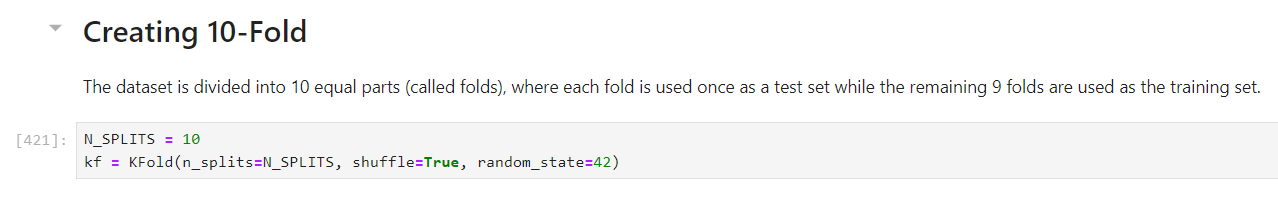

In [129]:
Image("ss/15.png")

The Random Forest Classifier is trained on the dataset and the metrics are calculated for each fold. The metrics are then stored in a pandas dataframe.

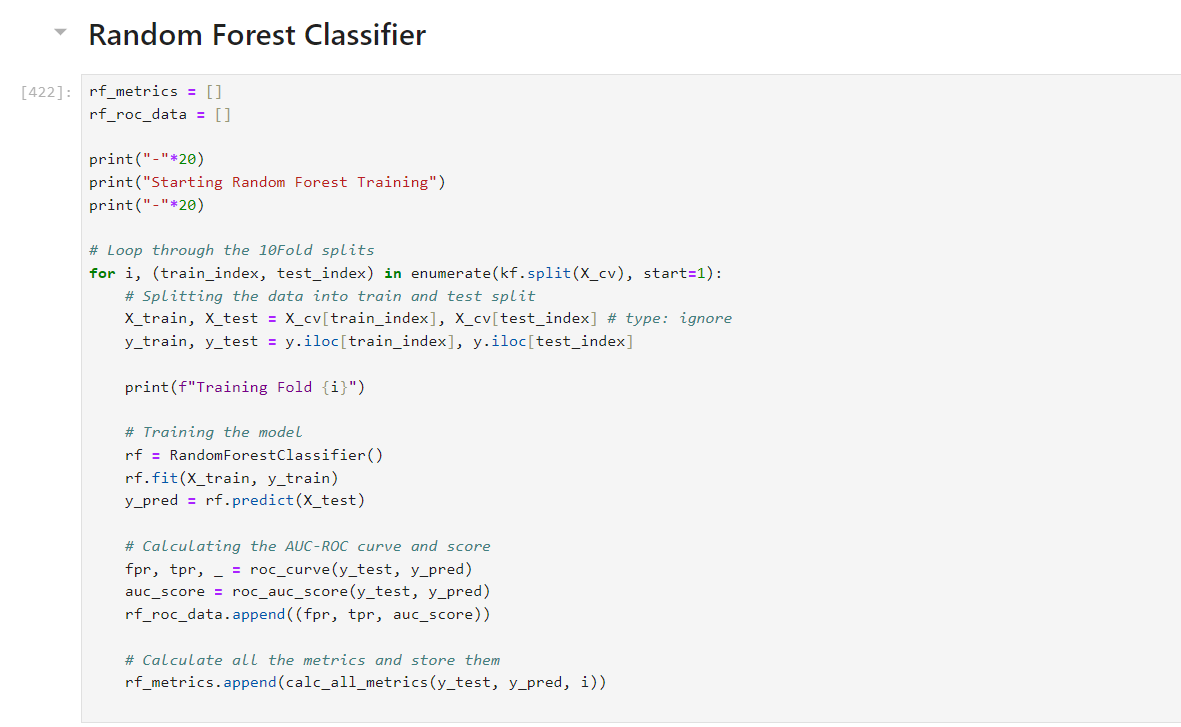

In [130]:
Image("ss/16.png")

* Once the Random Forest Classifier is trained, we add the name of the model to the metrics to later differentiate between the models when stored in the dataframe.
* We also call the plotting function to plot the AUC-ROC curve for each fold of the model based on the metrics calculated.

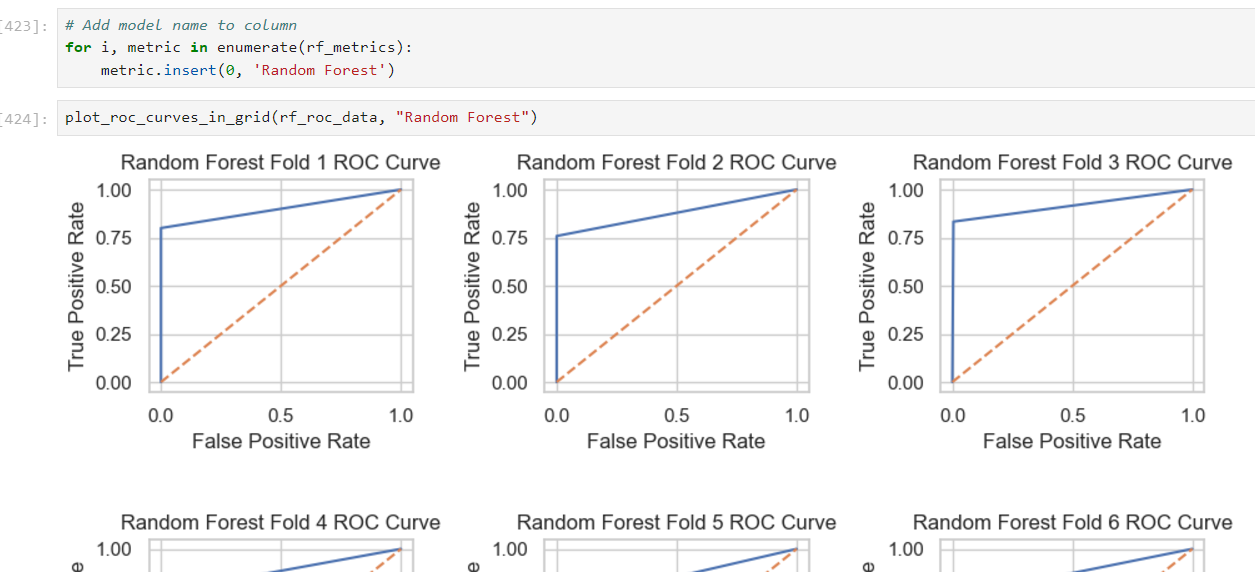

In [131]:
Image("ss/17.png")

Now we train the SVM model. SVM is trained on the dataset and the metrics are calculated for each fold. The metrics are then stored in an array which is later used to create a dataframe and tabulate our results.

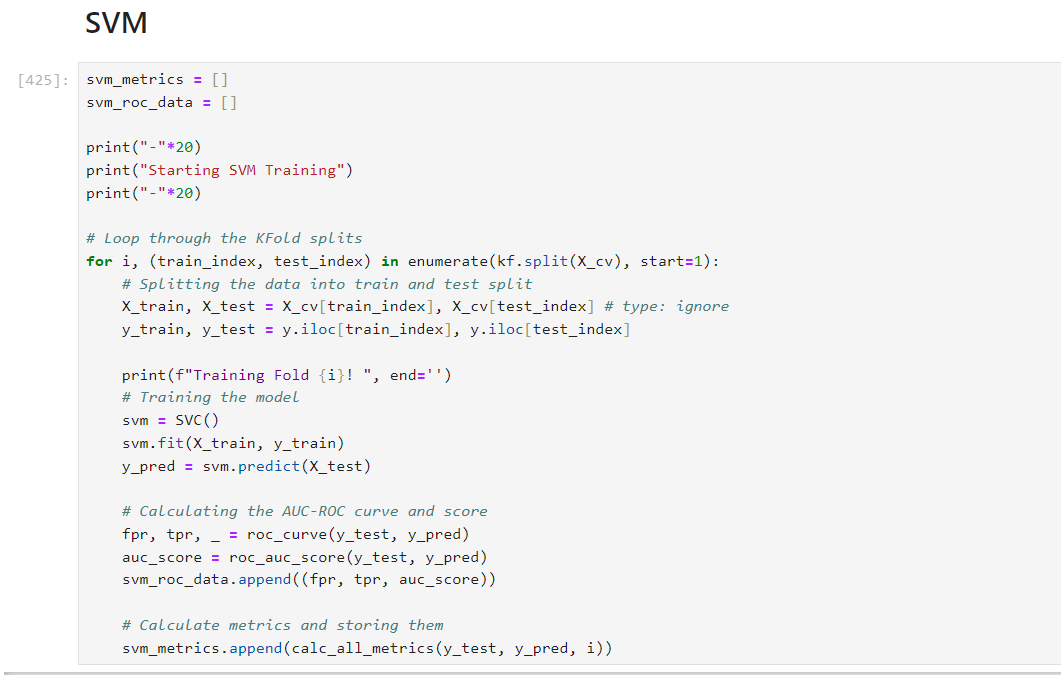

In [132]:
Image("ss/18.png")

Then we follow the same steps for SVM model as we did for Random Forest Classifier. We add the name of the model to the metrics to later differentiate between the models when stored in the dataframe. We also call the plotting function to plot the AUC-ROC curve for each fold of the model based on the metrics calculated.

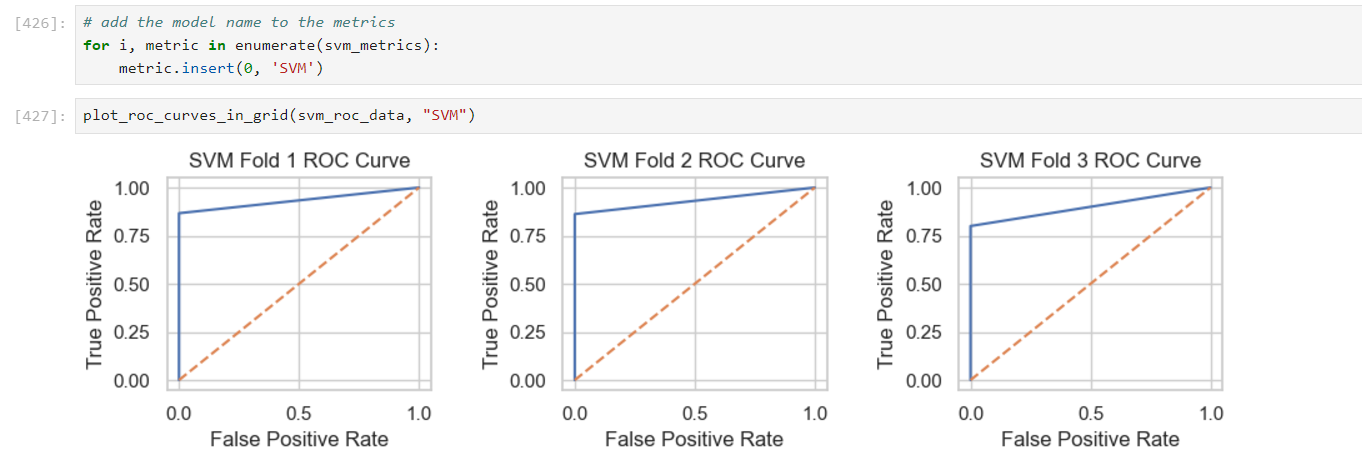

In [133]:
Image("ss/19.png")

<!-- Preprocess for lstm -->
* Now we preprocess the dataset for LSTM. We break the text into tokens and make them suitable for training an LSTM.
* We use Tokenizer from `keras.preprocessing.text` to convert the text into tokens.
* We use pad_sequences from `keras.preprocessing.sequence` to pad the sequences to the equal length.

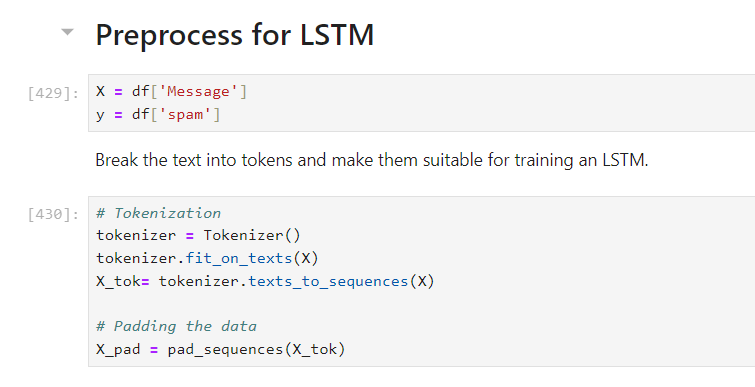

In [134]:
Image("ss/20.png")

Now we definte a function to build the LSTM model. The function is defined as follows:
* The function takes in the input and we define the input_shape from the input. This is binary classification so the output contains only 1 neuron which will output - 0 or 1.
* The function then builds the LSTM model using the Sequential API from Keras.
* The model consists of an Embedding layer, LSTM layer, Dense layer and an output layer.
* The model is then compiled using the Adam optimizer and binary crossentropy loss function.

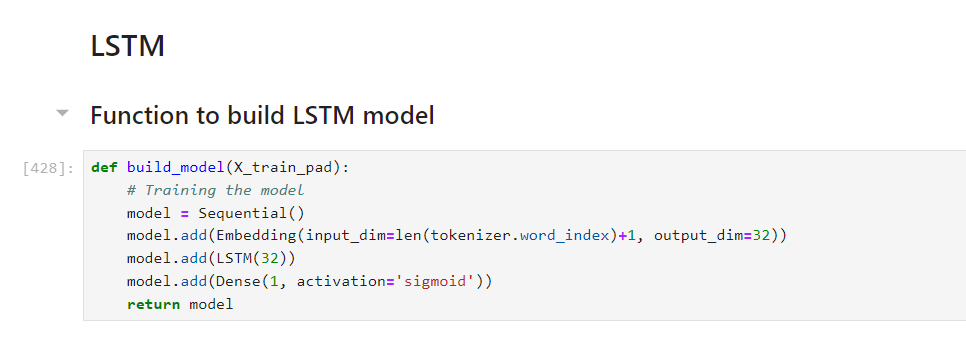

In [135]:
Image("ss/21.png")

Then we train our LSTM model on the dataset. The model is trained on the dataset and the metrics are calculated for each fold. The metrics are then stored in an array which is later used to create a dataframe and tabulate our results.

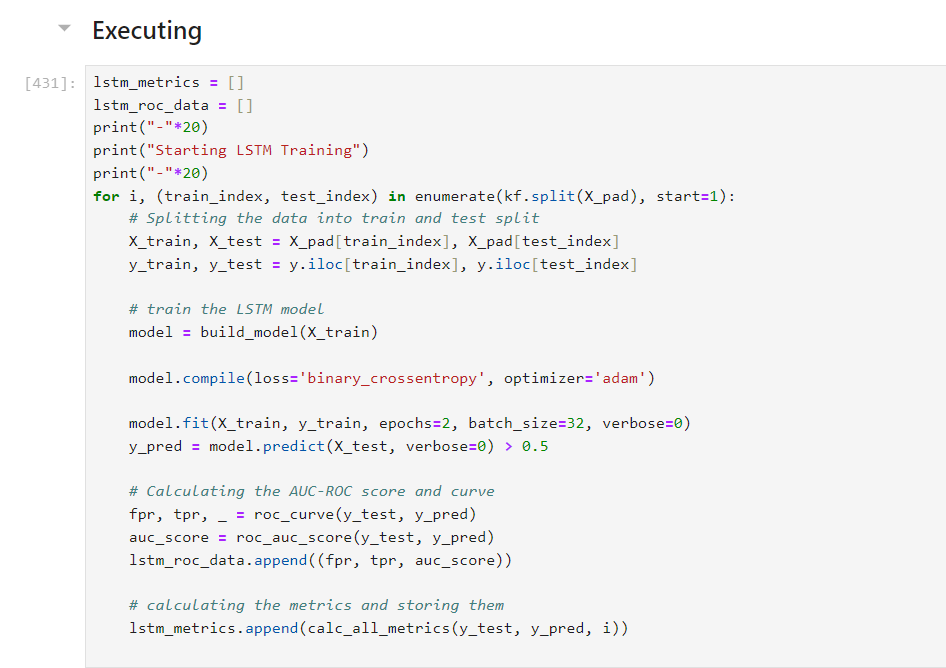

In [136]:
Image("ss/22.png")

Then we follow the same steps for LSTM model as we did for Random Forest Classifier and SVM. We add the name of the model to the metrics to later differentiate between the models when stored in the dataframe. We also call the plotting function to plot the AUC-ROC curve for each fold of the model based on the metrics calculated.

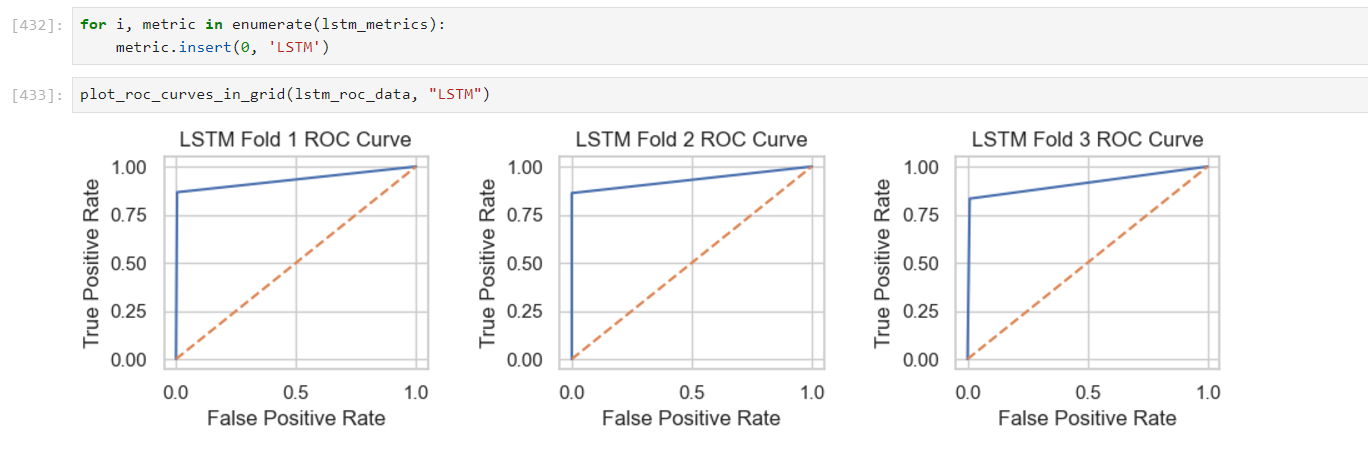

In [137]:
Image("ss/23.png")

Once all the models are trained and the metrics are calculated, we used the stored metrics data into table format using pandas dataframe. The metrics are stored in the dataframe in the following format:
* Fold Number
* Model Name
* TP
* FP
* TN
* FN
* TPR
* FPR
* TNR
* FNR
* Accuracy
* Precision
* Recall
* F1 Score
* Brier Score
* ROC AUC Score
* BSS

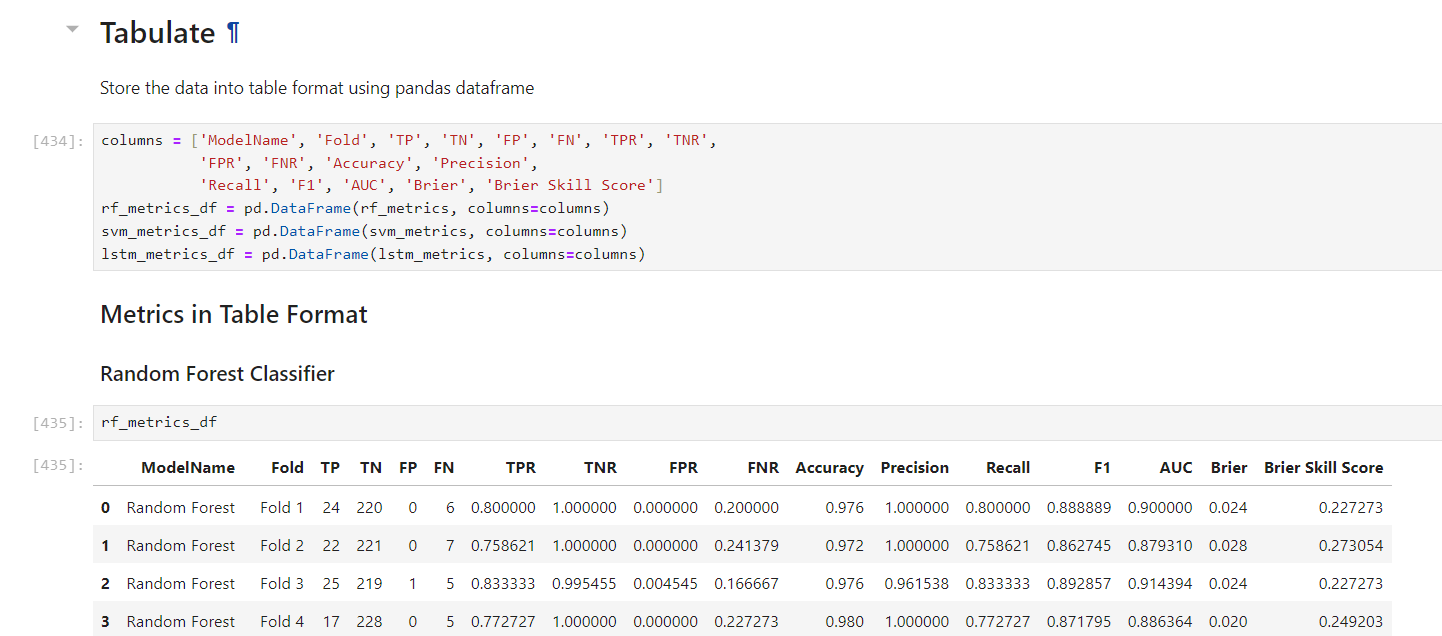

In [138]:
Image("ss/24.png")

We then group the metrics by their ModelName and calculate the mean of all the metrics in the dataframe. This gives us an average performance of the model across all the folds.

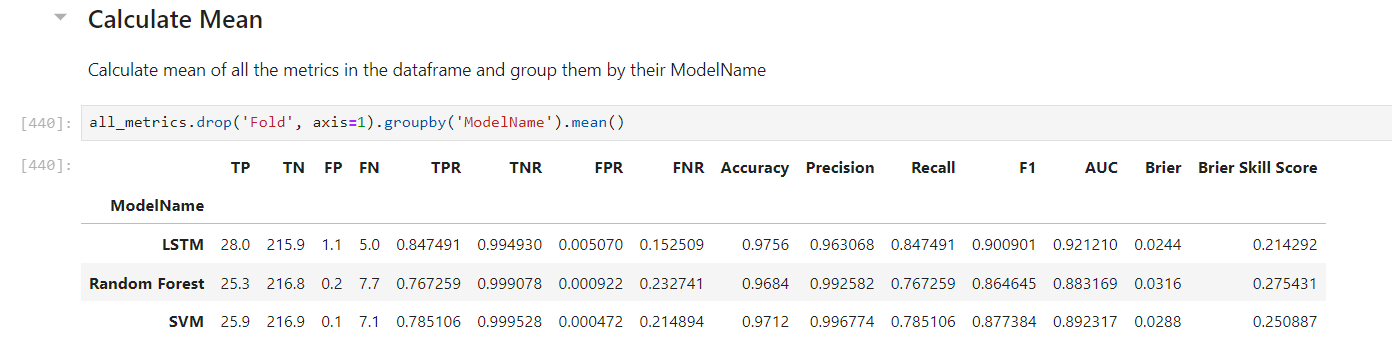

In [139]:
Image("ss/25.png")

Function print_all_metrics is used to print the mean of all metrics for each model in the dataframe.

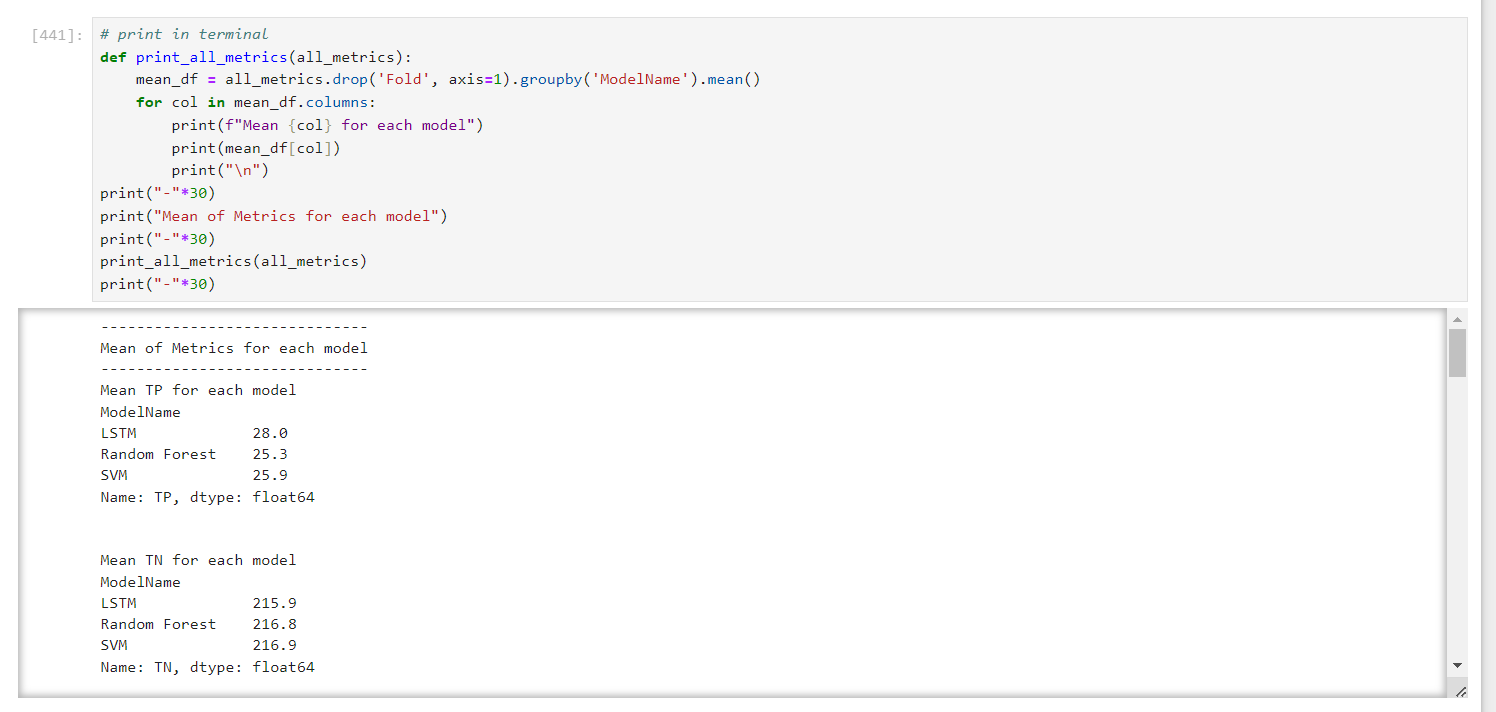

In [140]:
Image("ss/26.png")

* Now we plot the metrics of Random Forest Classifier by their each folds. The metrics are plotted in the form of a line graph.
* This is done to visualize the performance of the model across all the folds.
* This is also done for SVM and LSTM models.

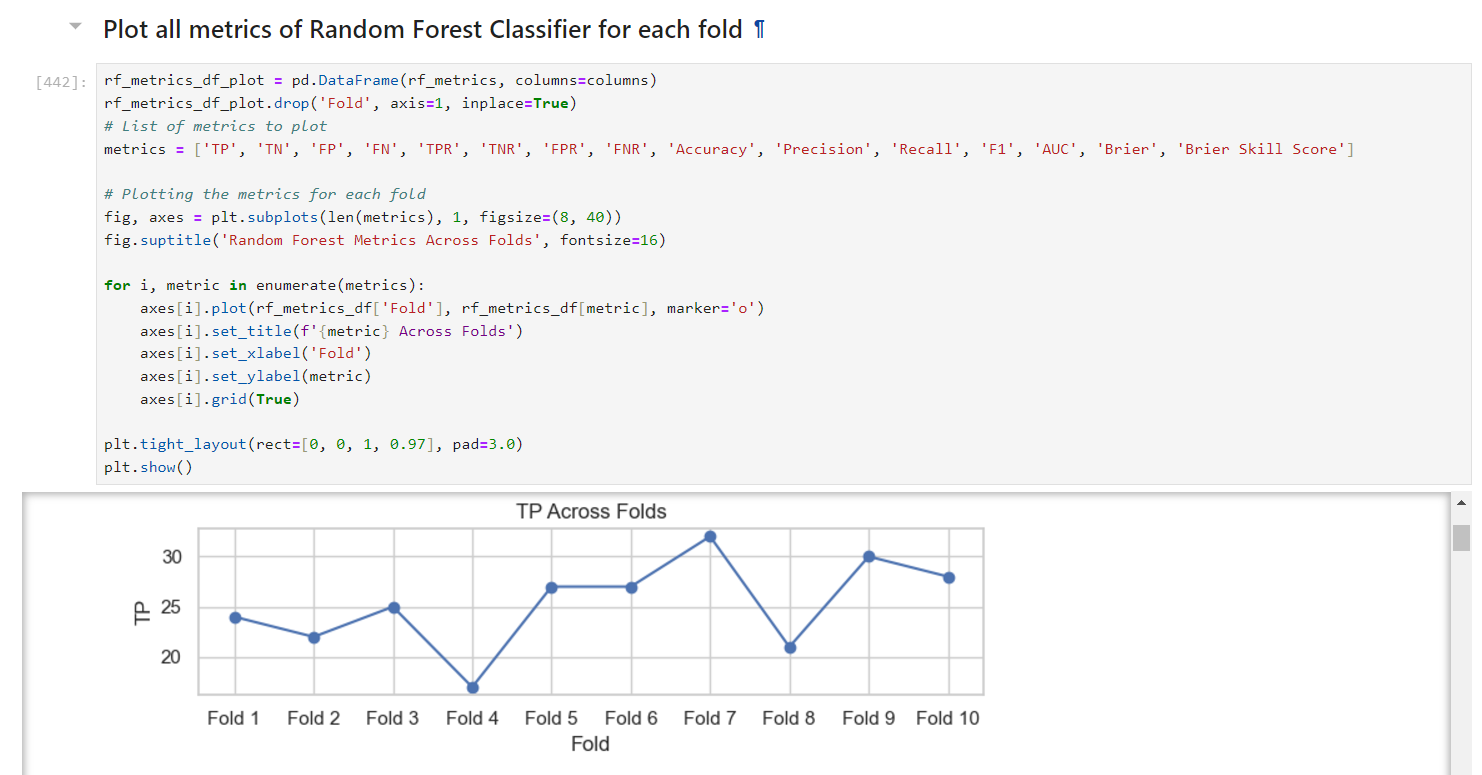

In [141]:
Image("ss/27.png")

Finally, we plot a boxplot to compare the performance of all the models, giving us a highs, lows, outliers, etc. This is done to compare the performance of the models and see which model performs the best.

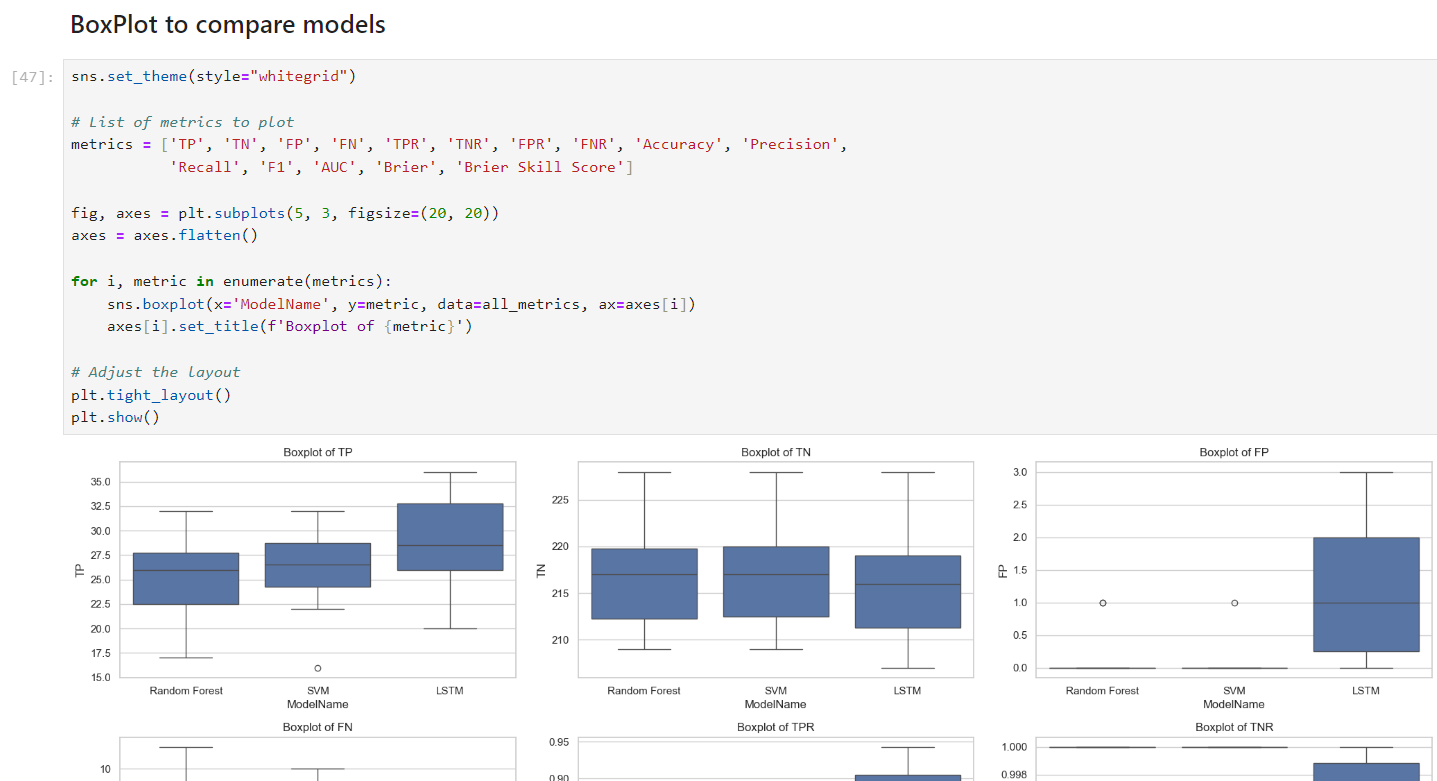

In [142]:
Image("ss/28.png")

# Python Script Execution Screenshots

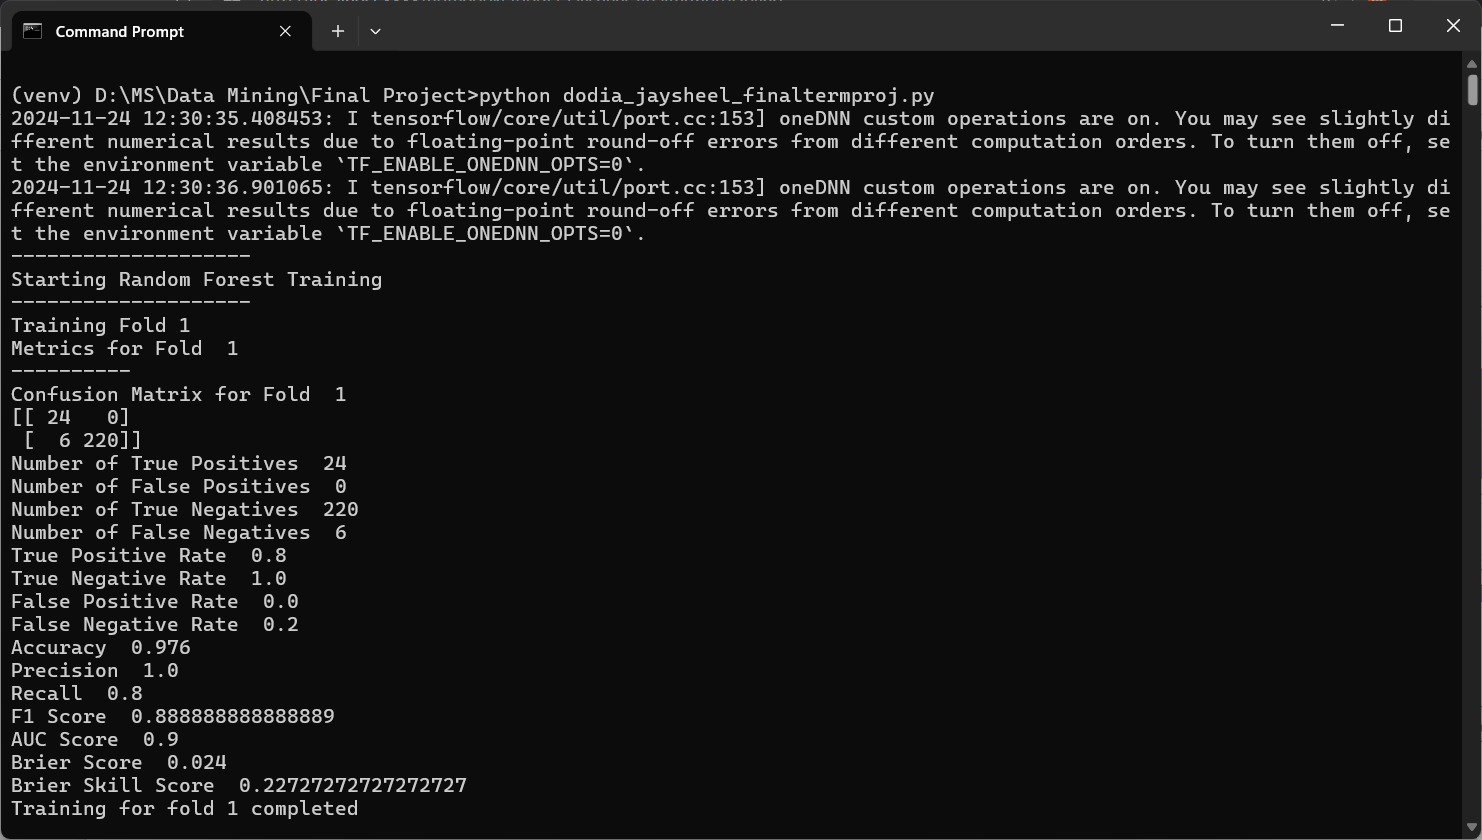

In [147]:
Image("ss/29.png")

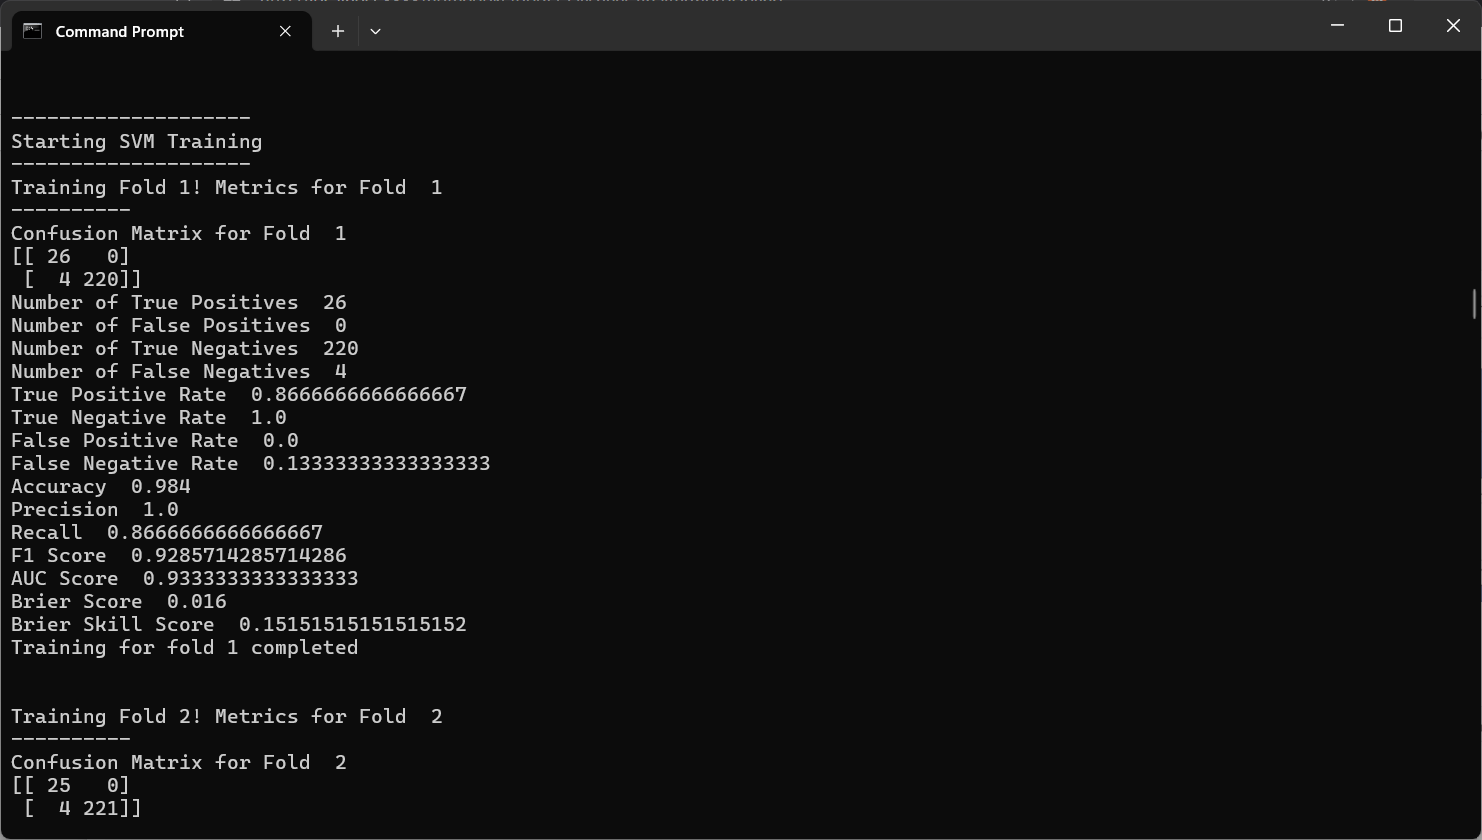

In [148]:
Image("ss/30.png")

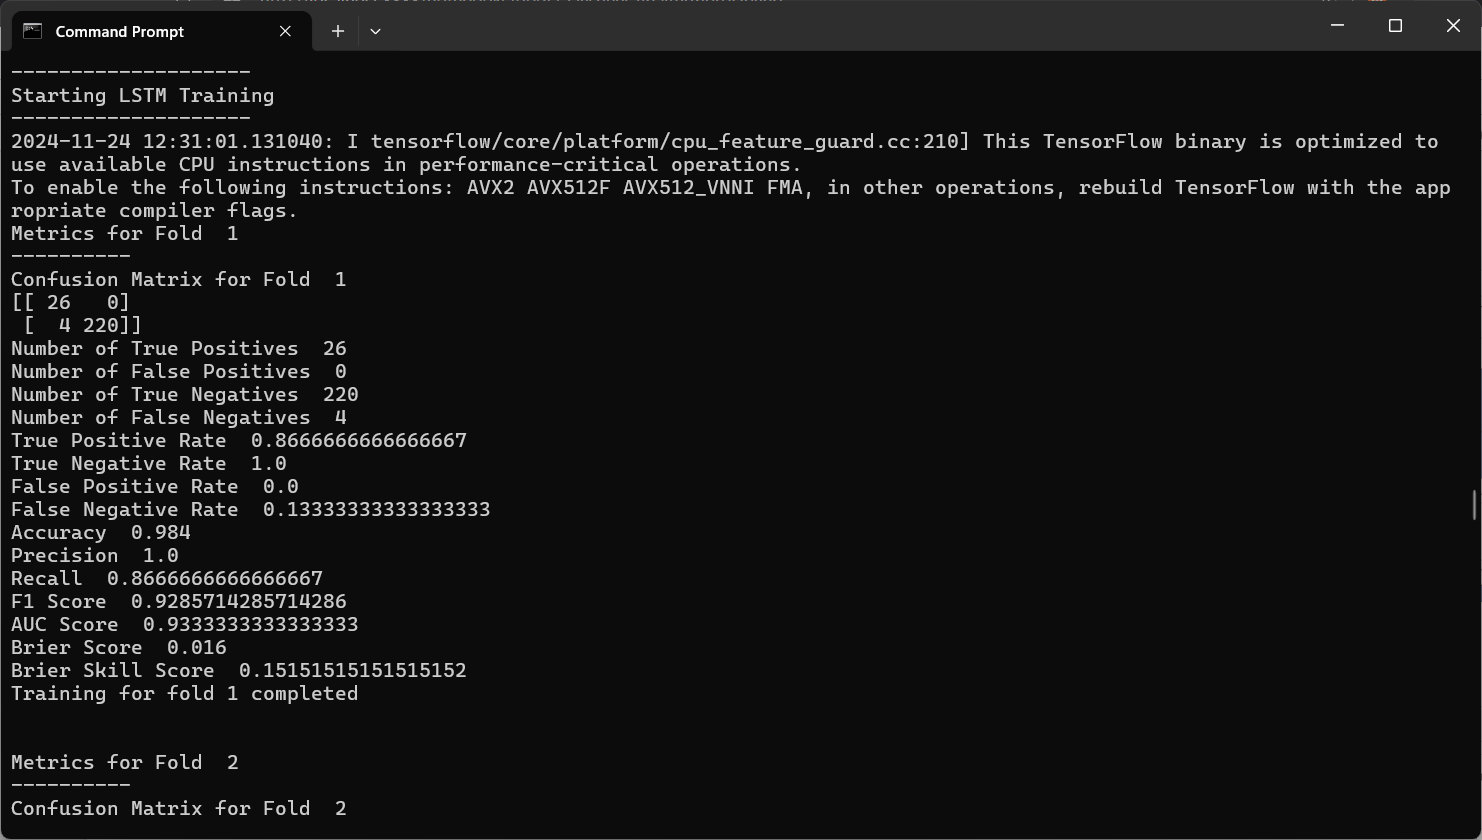

In [149]:
Image("ss/31.png")

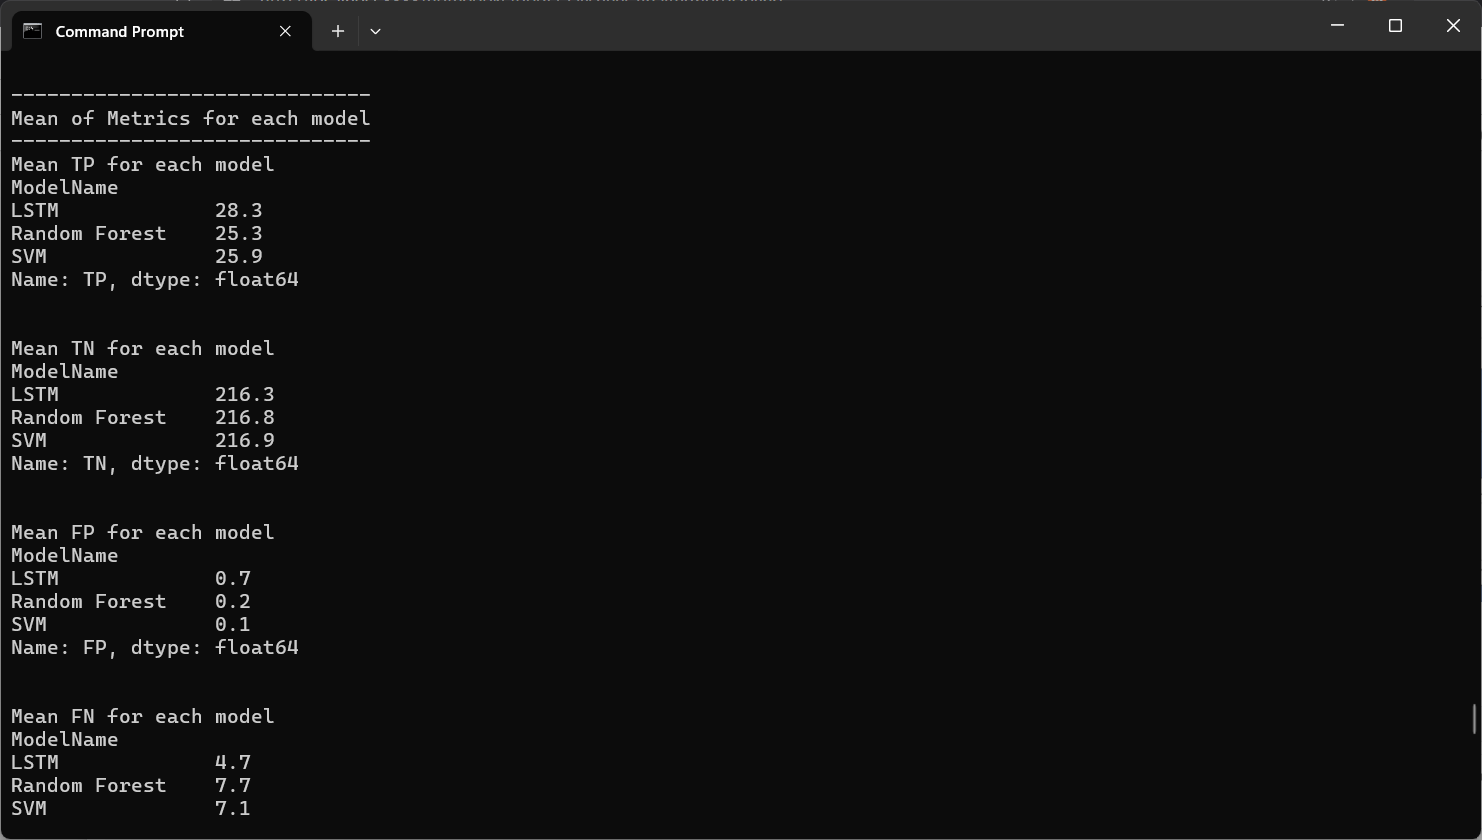

In [150]:
Image("ss/32.png")

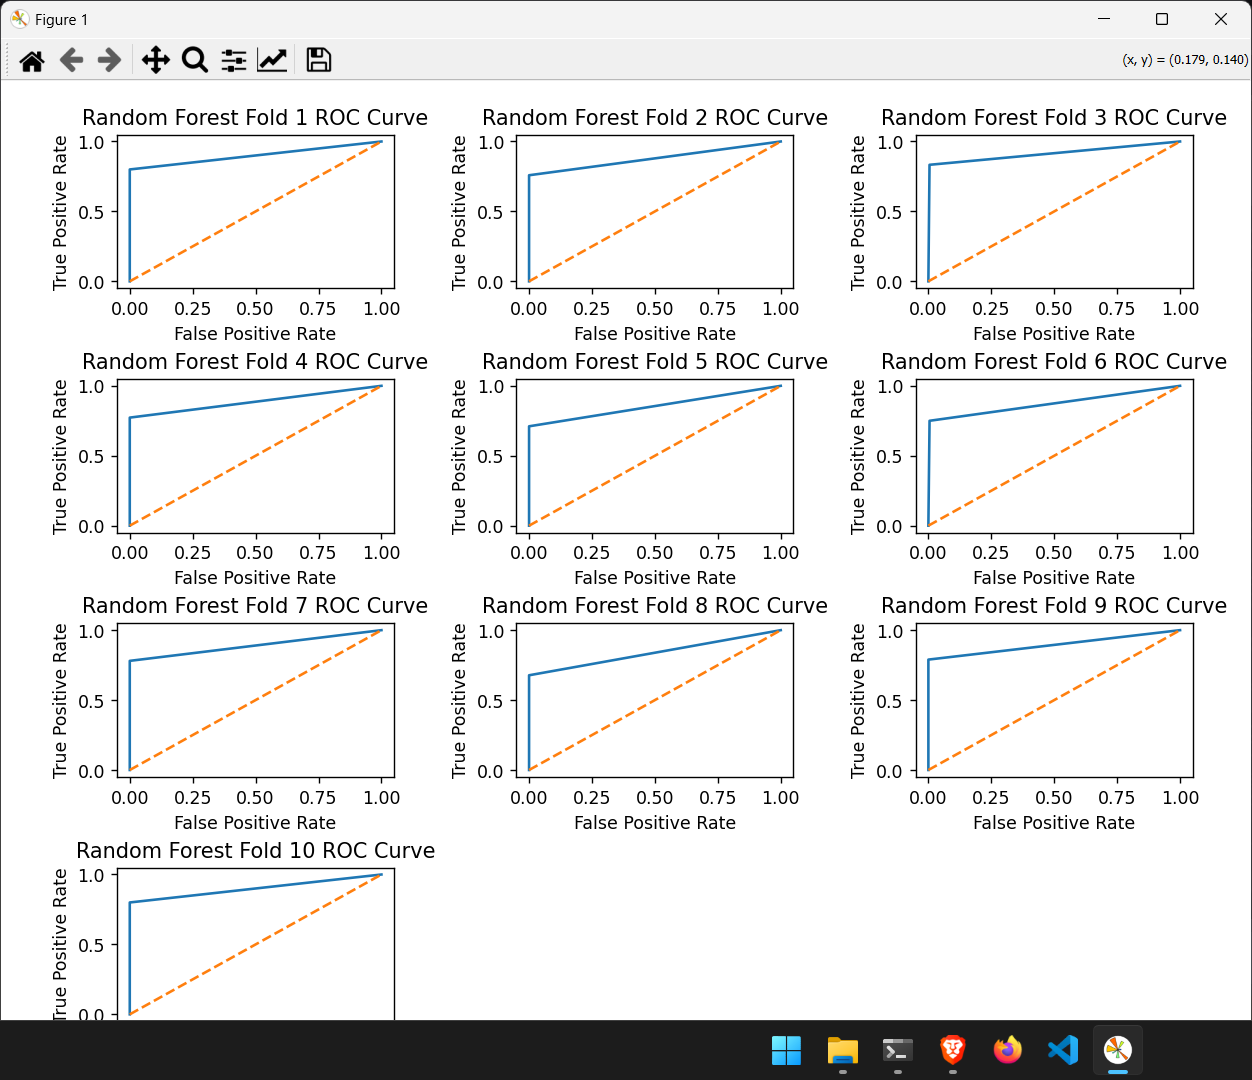

In [151]:
Image("ss/33.png")

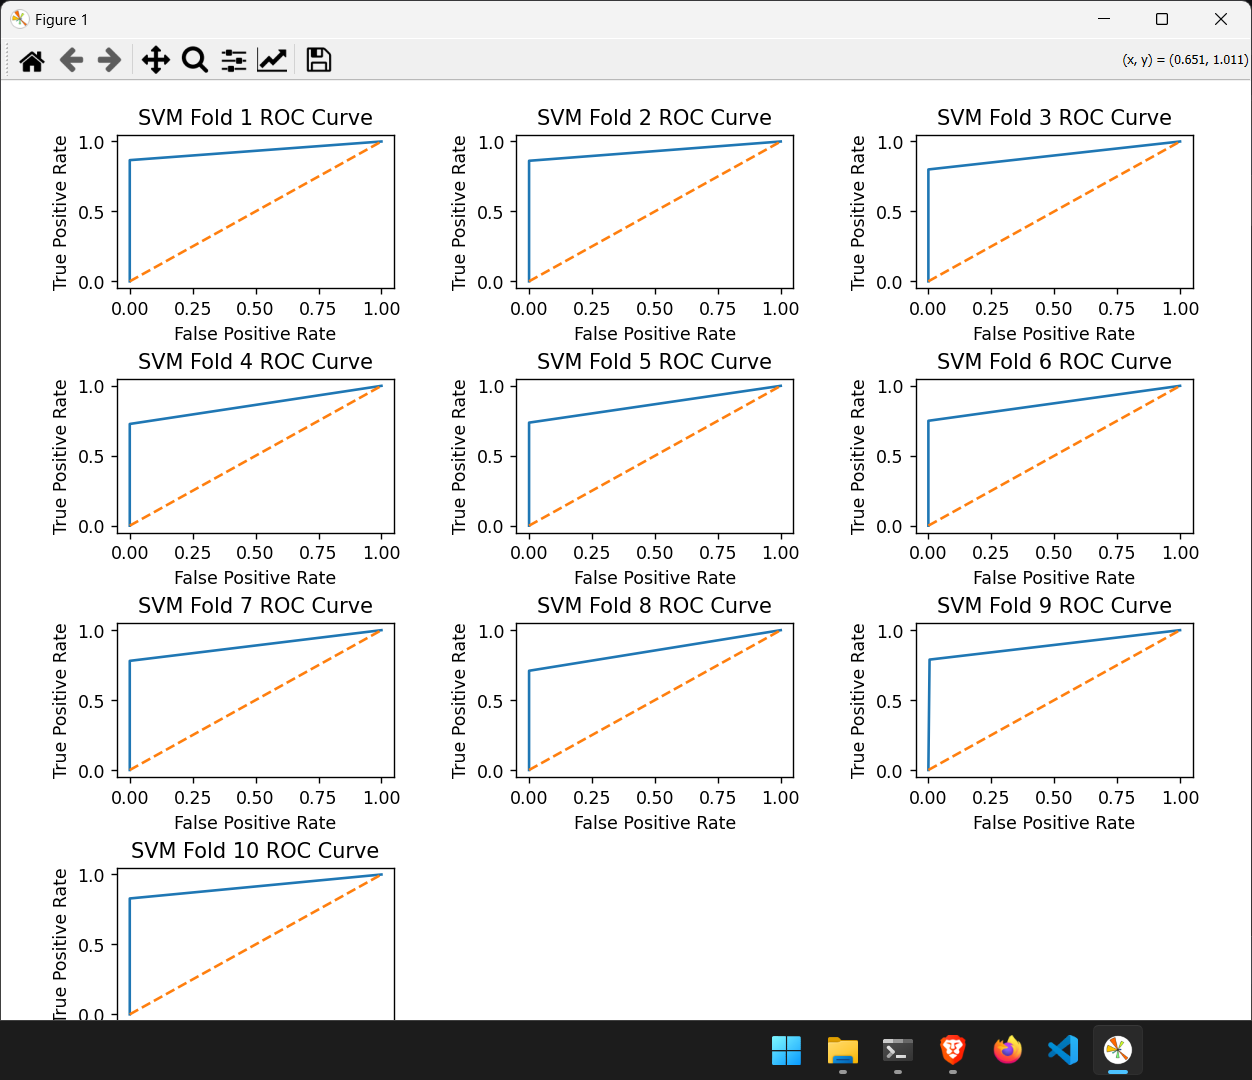

In [152]:
Image("ss/34.png")

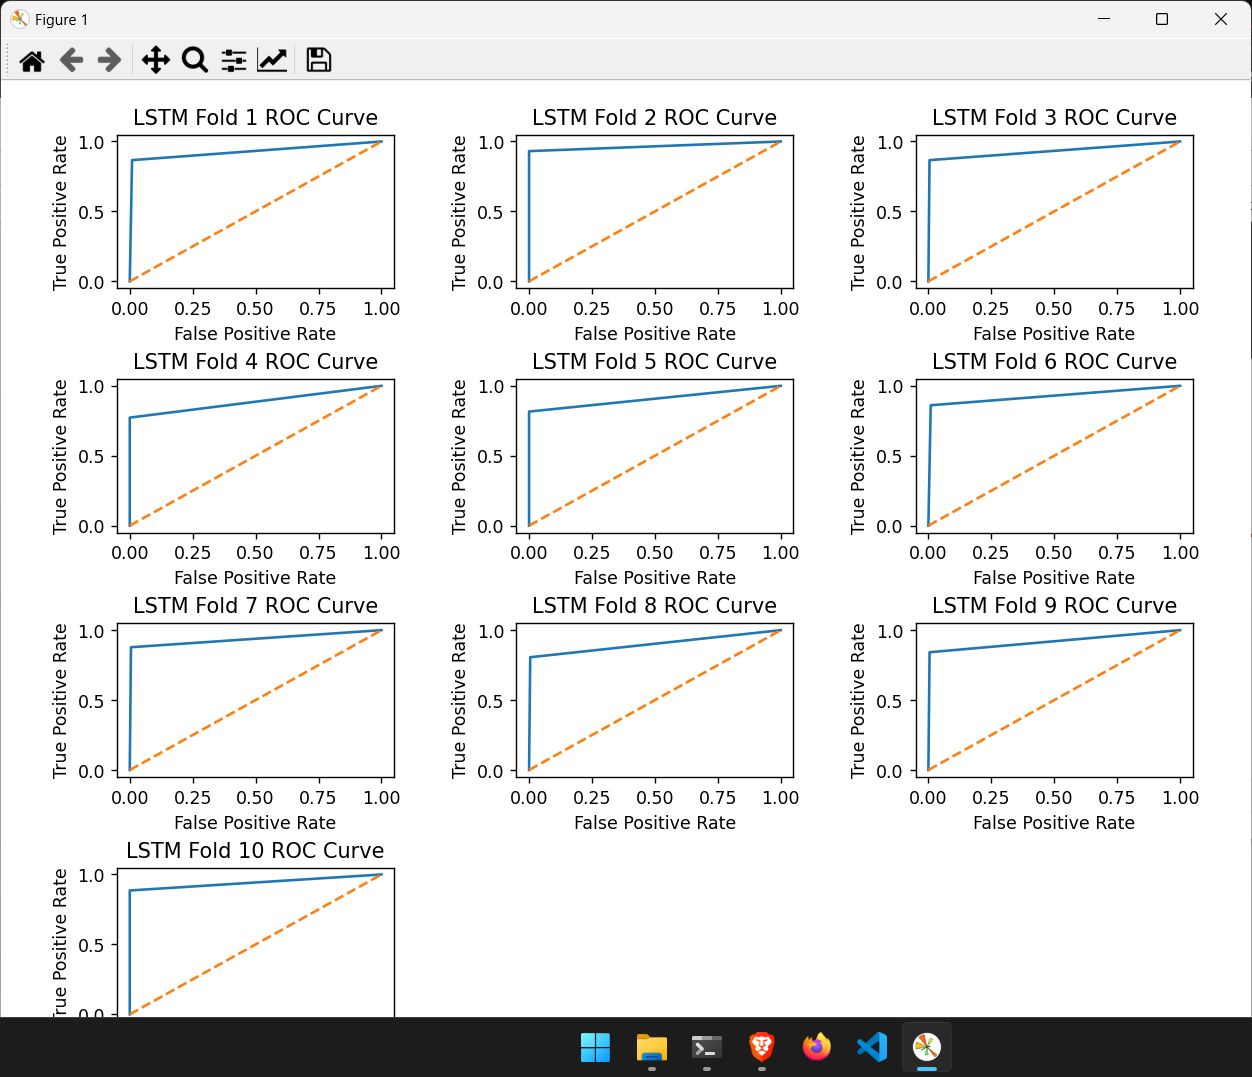

In [153]:
Image("ss/35.png")

# Output

* When executing the code in terminal we see all the metrics that are calculated for each fold when training each model on 10 Fold.
* We successfully train the model on all the folds and generating graphs for ROC Curve
* We also print the comparison of mean of metrics for all the models in our terminal. Which shows mean of a metric across all 3 models

# Other

The source code (.py file) and data sets (.csv files) will be attached to the zip file.

Link to GitHub repository
https://github.com/jaysheeldodianjit/dodia_jaysheel_finalproject